In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from netgraph import Graph # pip install netgraph

A = 2 # number of actions
S = 4 # number of states

State space definition for the example

In [2]:
# Player1 action / Player2 action / starting state / ending state / probability
#Player 1 - column player - 0: .3, 1: .4
#Player 2 - row player - 0: .1, 1: .2
TRANSITION_MATRIX = np.array(
    [
        # Player 1 - Action 0
        [
            # Player 2 - Action 0
            [
                
                [0, 0.5, 0, 0.5],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0.5, 0, 0, 0.5]
                
            ],

            # Player 2 - Action 1
            [
                
                [1, 0, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [0.5, 0, 0, 0.5]
                
            ]
        ],

        # Player 1 - Action 1
        [
            # Player 2 - Action 0
            [
                
                [1, 0, 0, 0],
                [0, 0, 0, 1],
                [0, 0, 0, 1],
                [0.5, 0, 0, 0.5]
                
            ],

            # Player 2 - Action 1
            [
                
                [0, 0.5, 0, 0.5],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [0.5, 0, 0, 0.5]
                
            ]
        ]
    ]
)

In [3]:
# create the graph using networkx library
G = nx.DiGraph()
edge_labels = {}

# add the states to the graph
for action_1 in range(A):
    for action_2 in range(A):
        for i in range(S):
            for j in range(S):
                if TRANSITION_MATRIX[action_1][action_2][i][j] > 0:
                    str_label = '(' + str(action_1) + ', ' + str(action_2) + '), p: ' + str(TRANSITION_MATRIX[action_1][action_2][i][j])
                    #print(i, j)
                    #print(str_label)
                    G.add_edge(i, j)
                    if edge_labels.get((i, j)) is not None:
                        edge_labels[(i, j)] += '\n' + str_label
                    else:
                        edge_labels[(i, j)] = str_label

First graph option

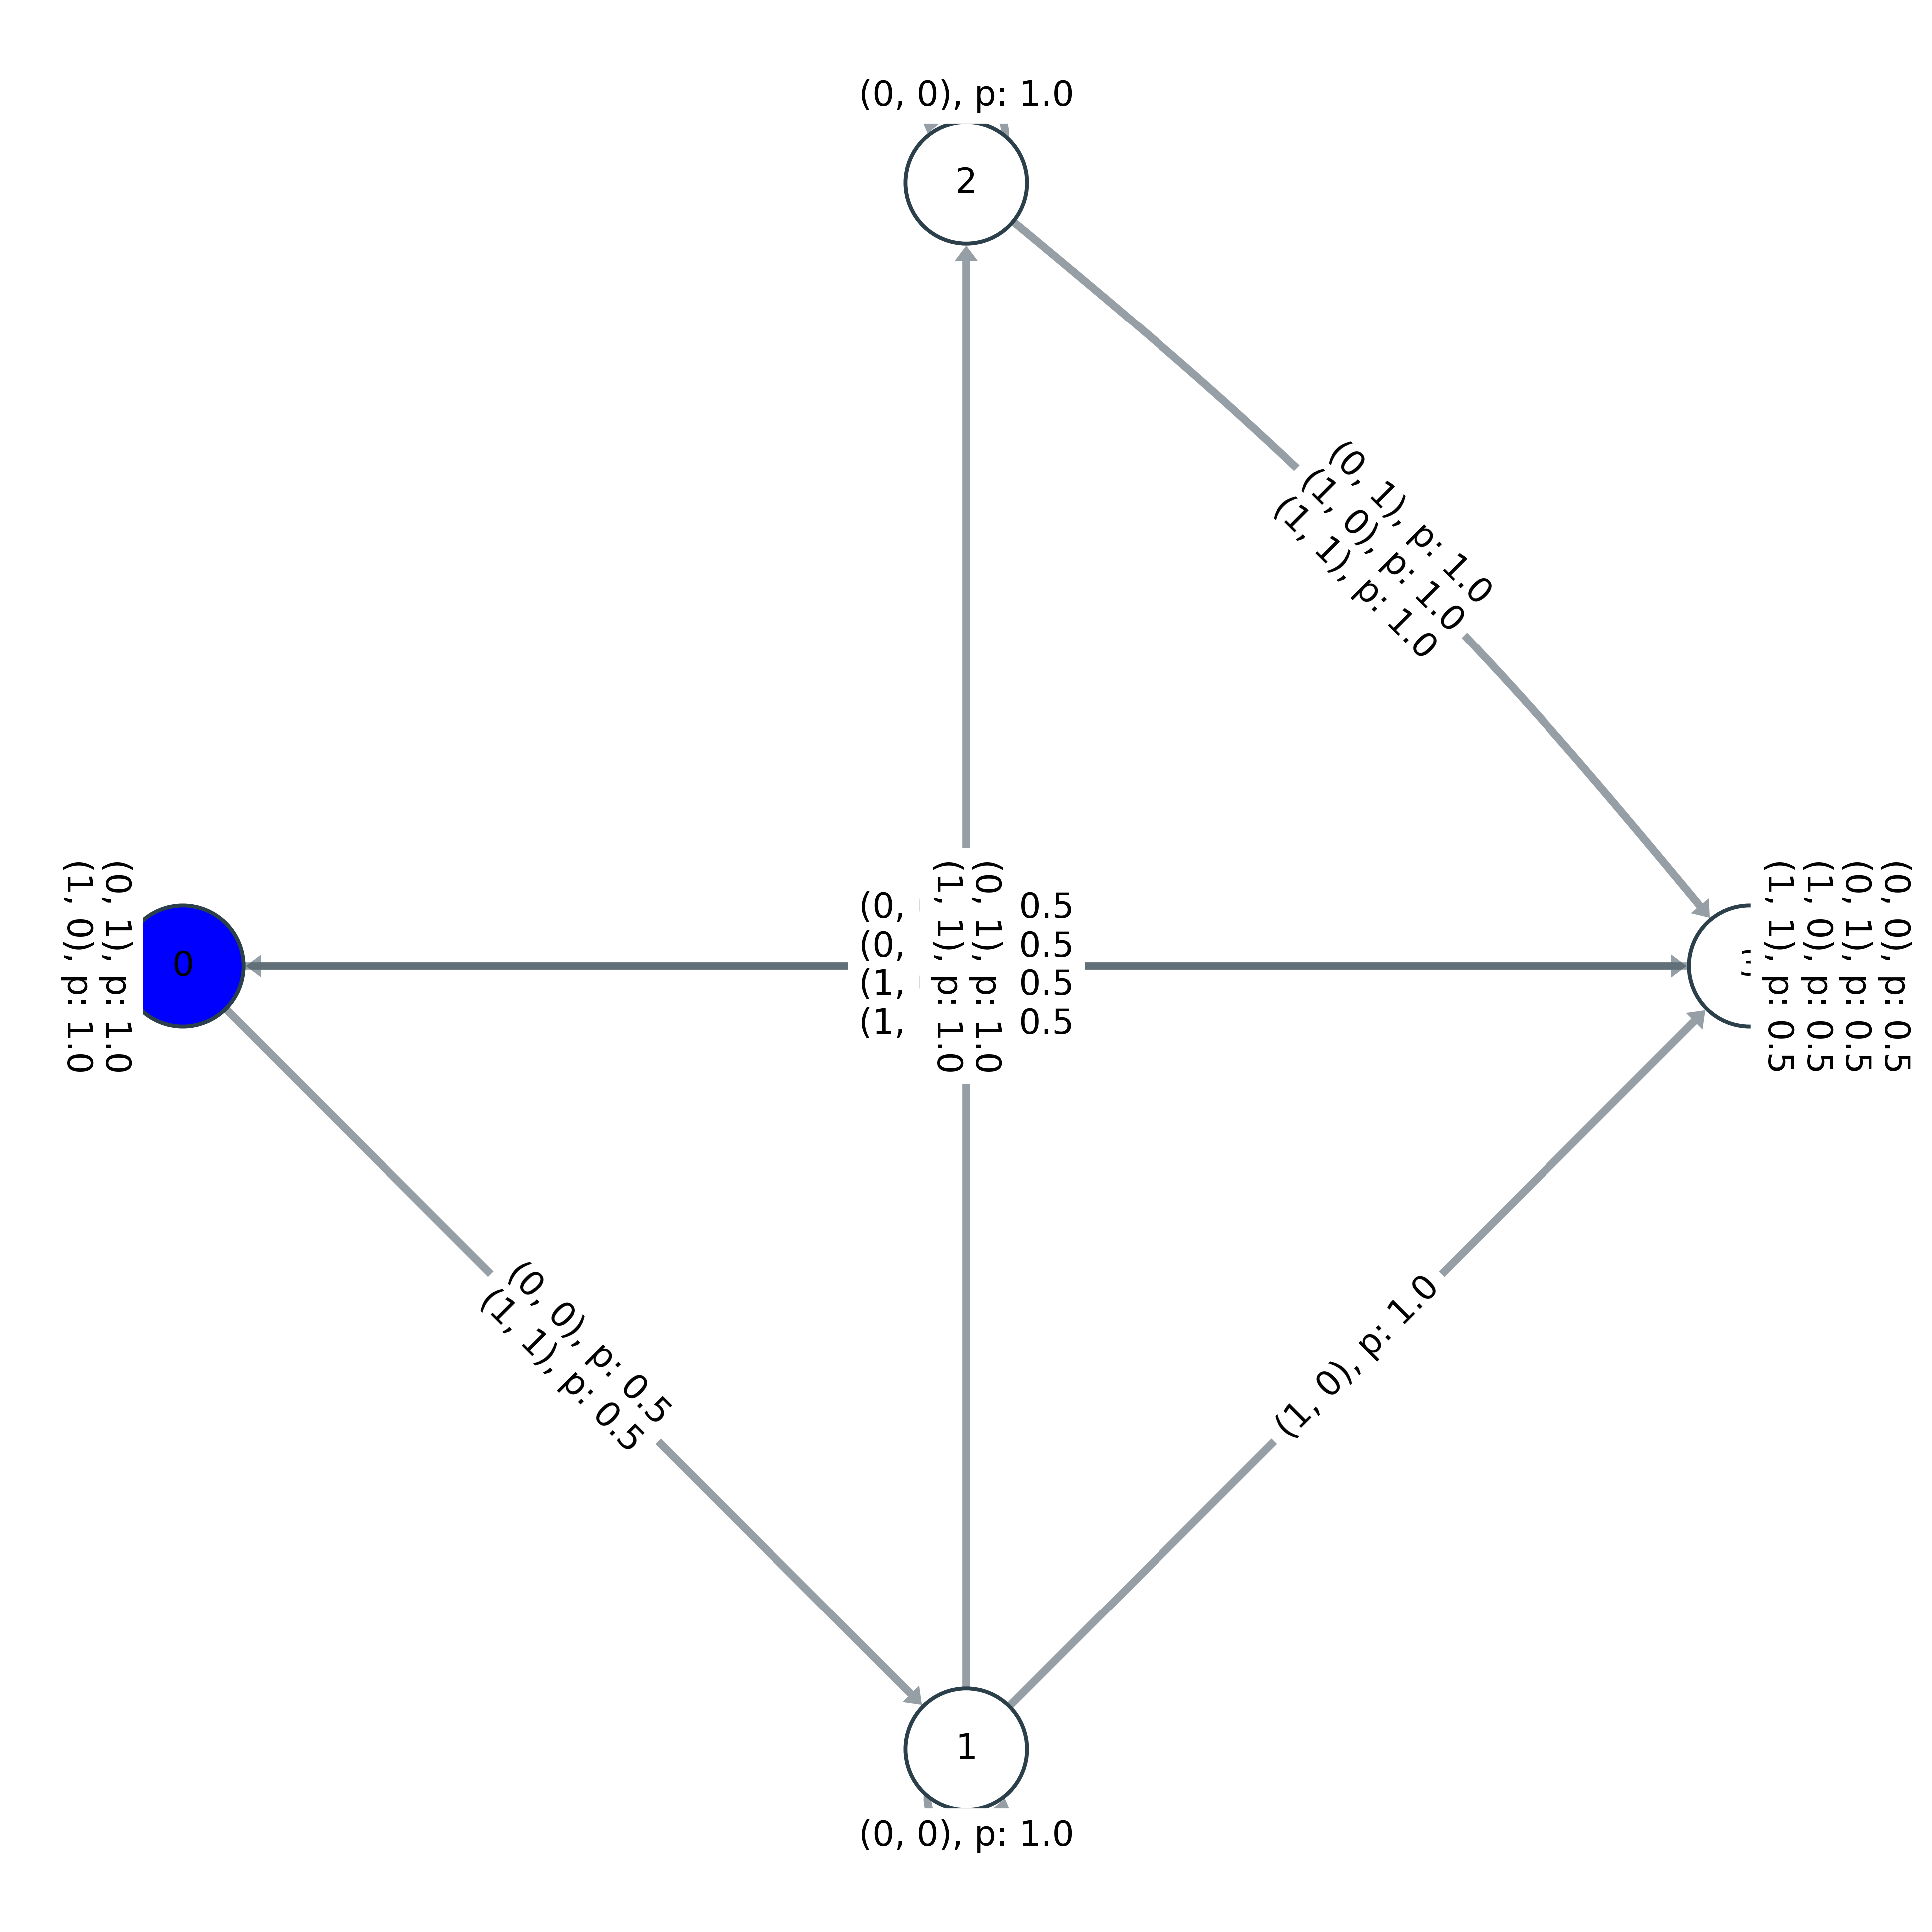

In [4]:
# Define a color for each node
node_color = {0:'b', 1:'w', 2:'w', 3:'w'}  # replace with your actual colors

# setting paramethers for the plot
pos = nx.shell_layout(G)
fig, ax = plt.subplots(figsize=(50, 50))

# plot the graph
Graph(G, ax=ax, node_layout=pos, edge_layout='curved', origin=(0, 0),
      node_color=node_color, node_size=8.,
      node_labels=True, node_label_fontdict=dict(size=50),
      edge_labels=edge_labels, edge_label_fontdict=dict(size=50),
      arrows=True, arrowstyle='-|>', arrowsize=20, arrow_color='r',
)
plt.show()


Second option

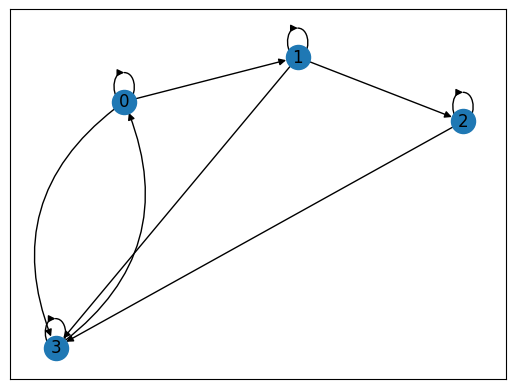

In [5]:
# draw the graph
pos = nx.spring_layout(G, seed=100)
fig, ax = plt.subplots()
nx.draw_networkx_nodes(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)
curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
straight_edges = list(set(G.edges()) - set(curved_edges))
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=straight_edges)
arc_rad = 0.4
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=curved_edges, connectionstyle=f'arc3, rad = {arc_rad}')
plt.show()

In [6]:
# Define a color for each node
node_colors = {0:'b', 1:'w', 2:'w', 3:'w'}  # replace with your actual colors

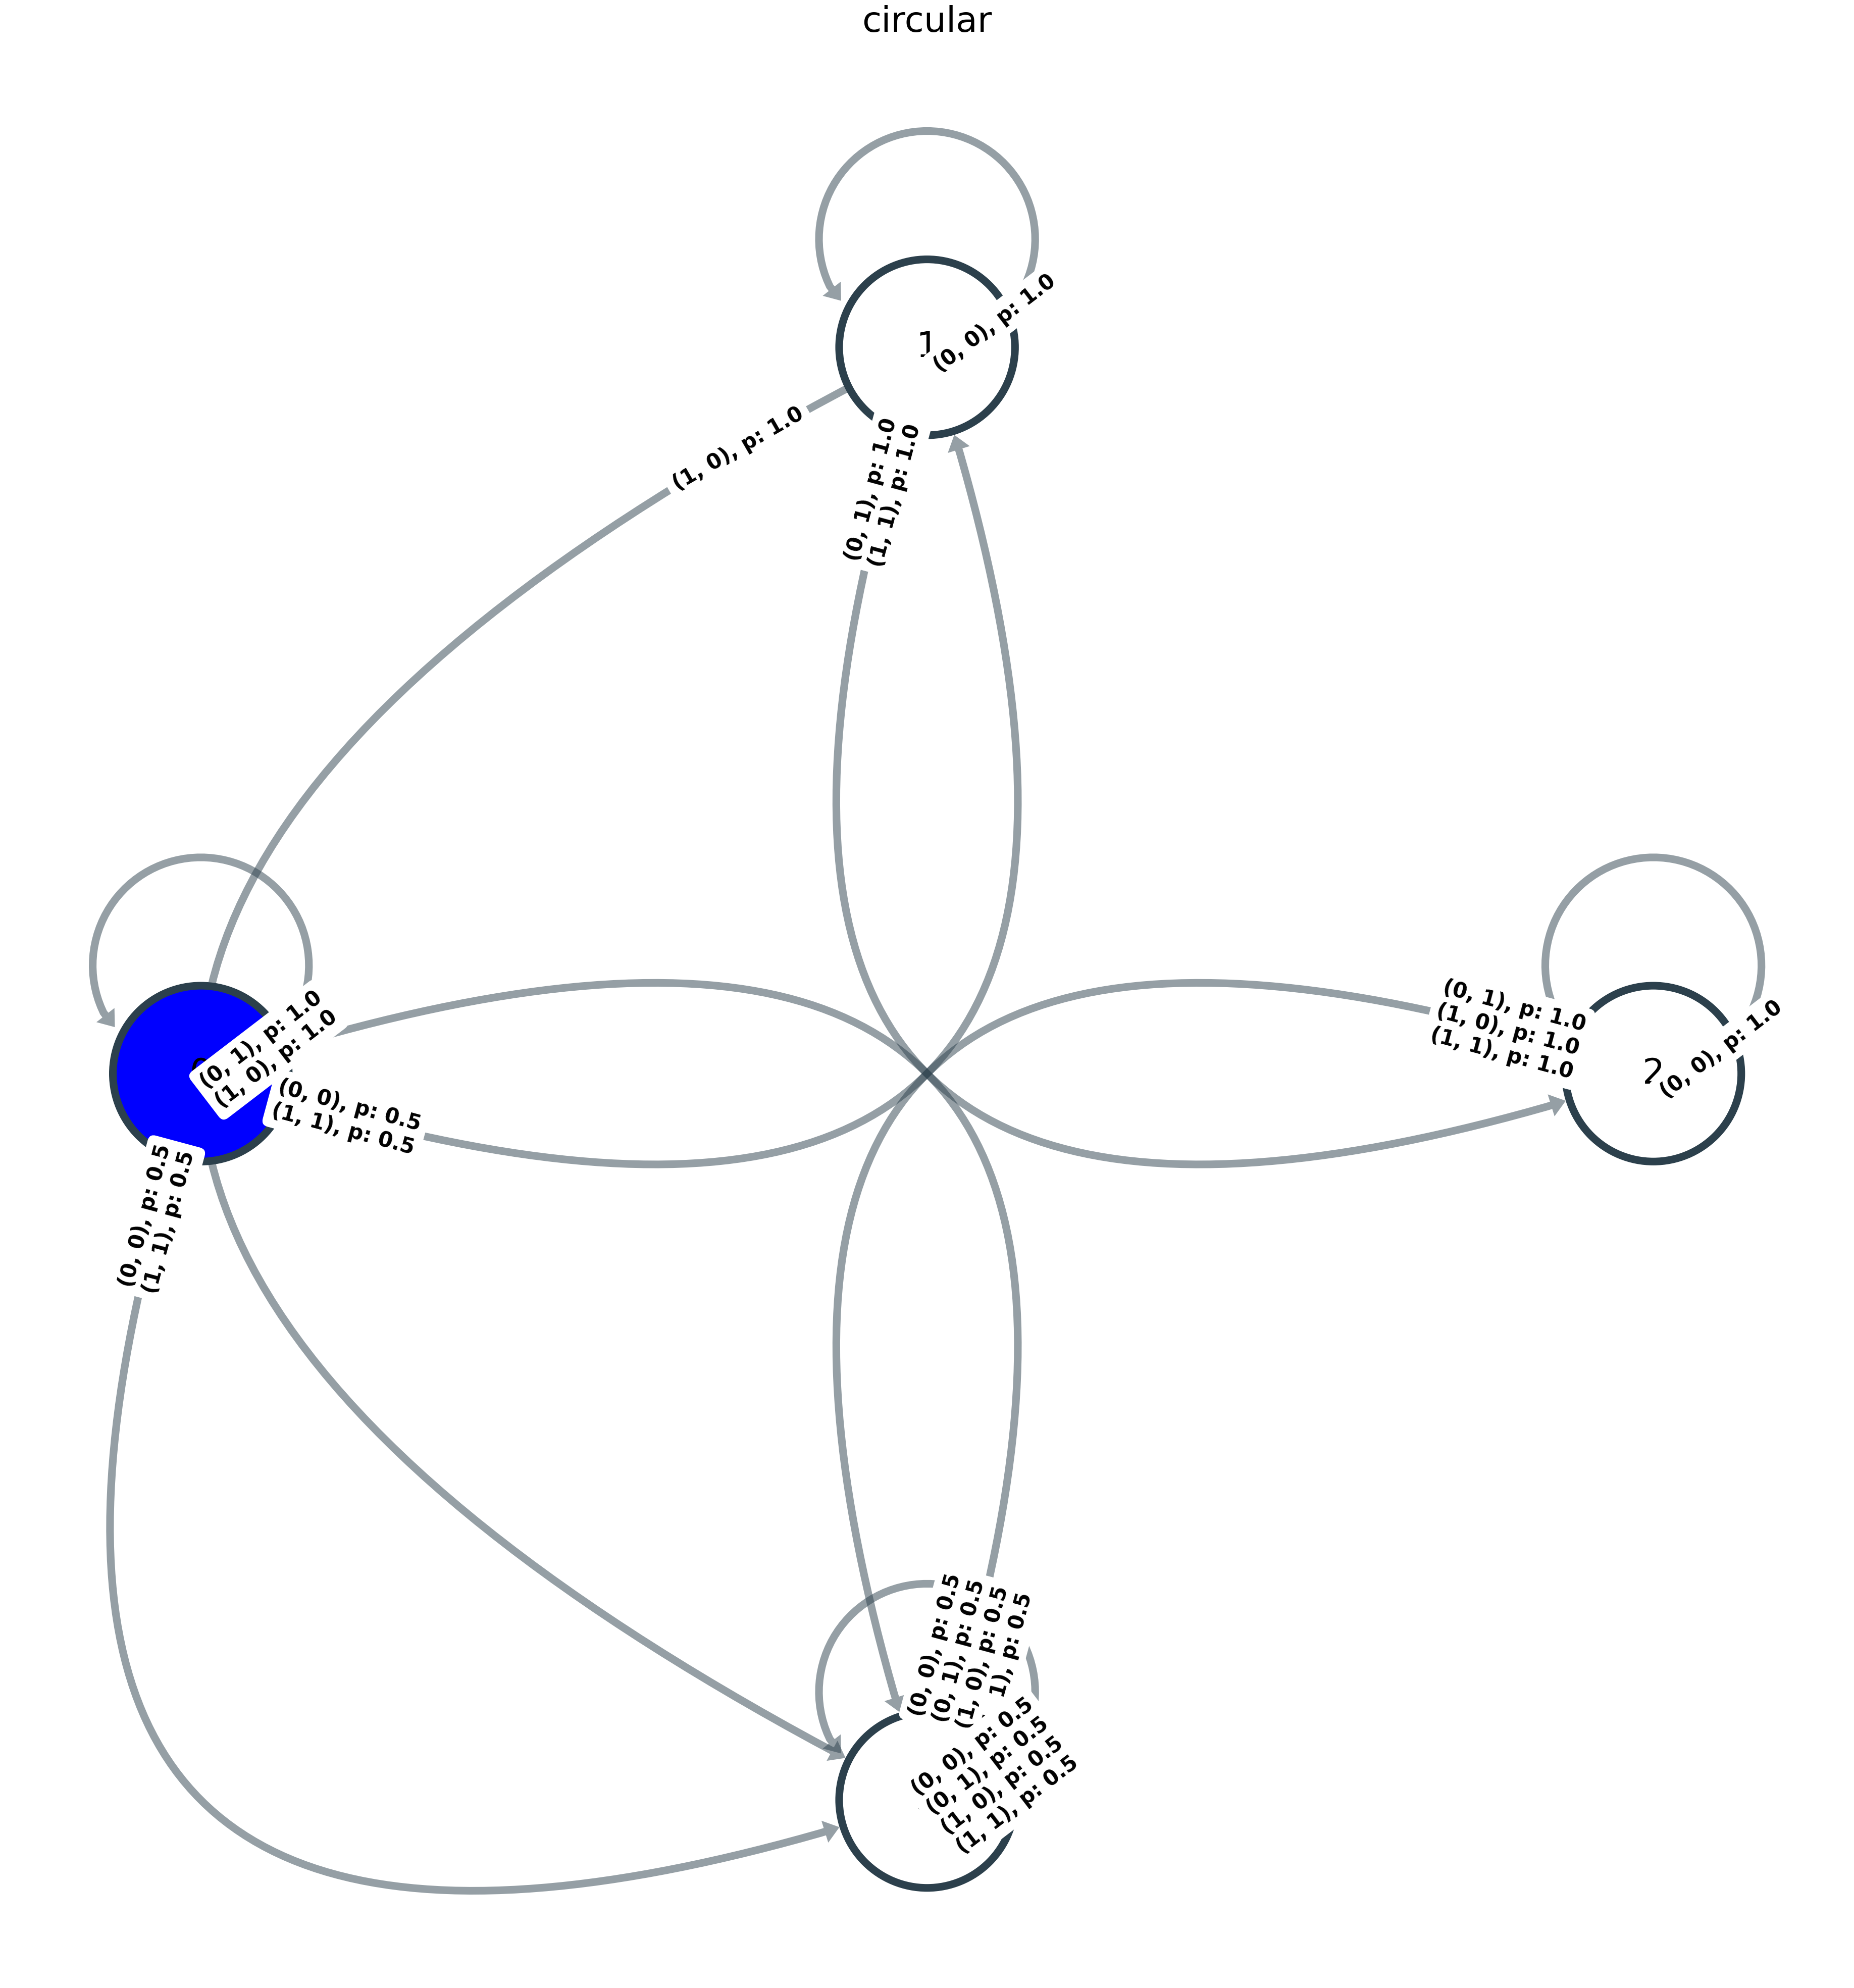

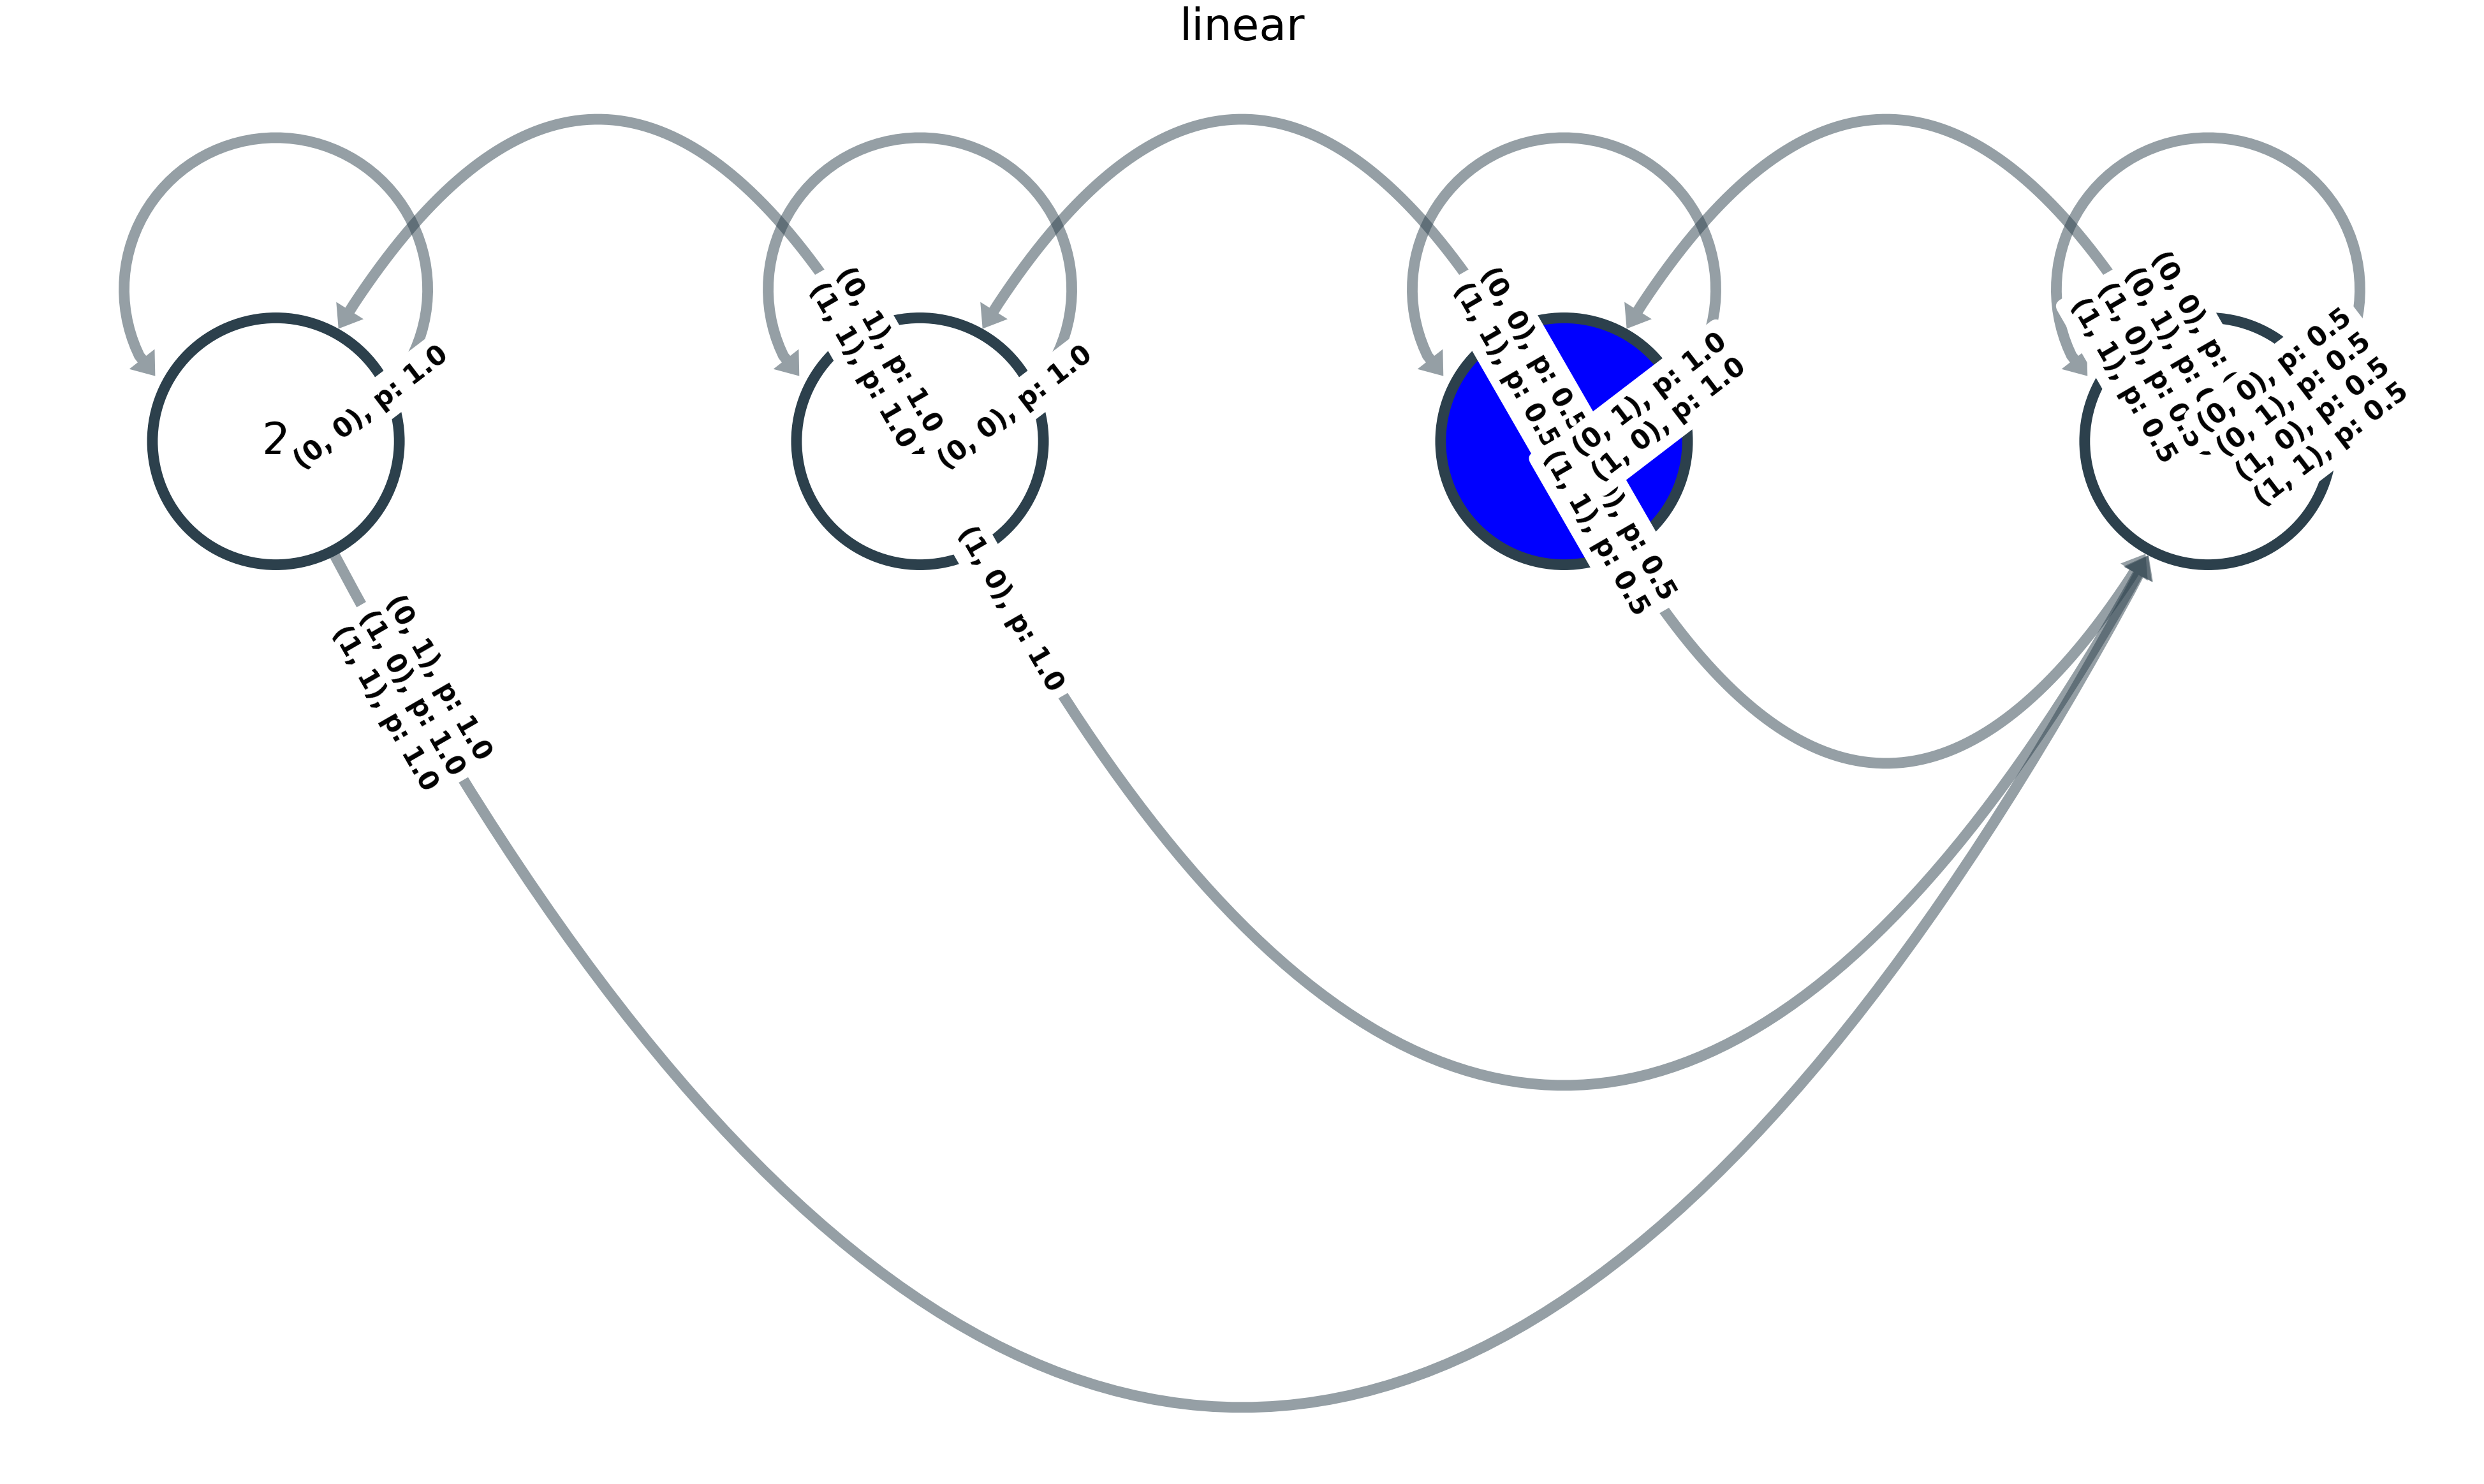

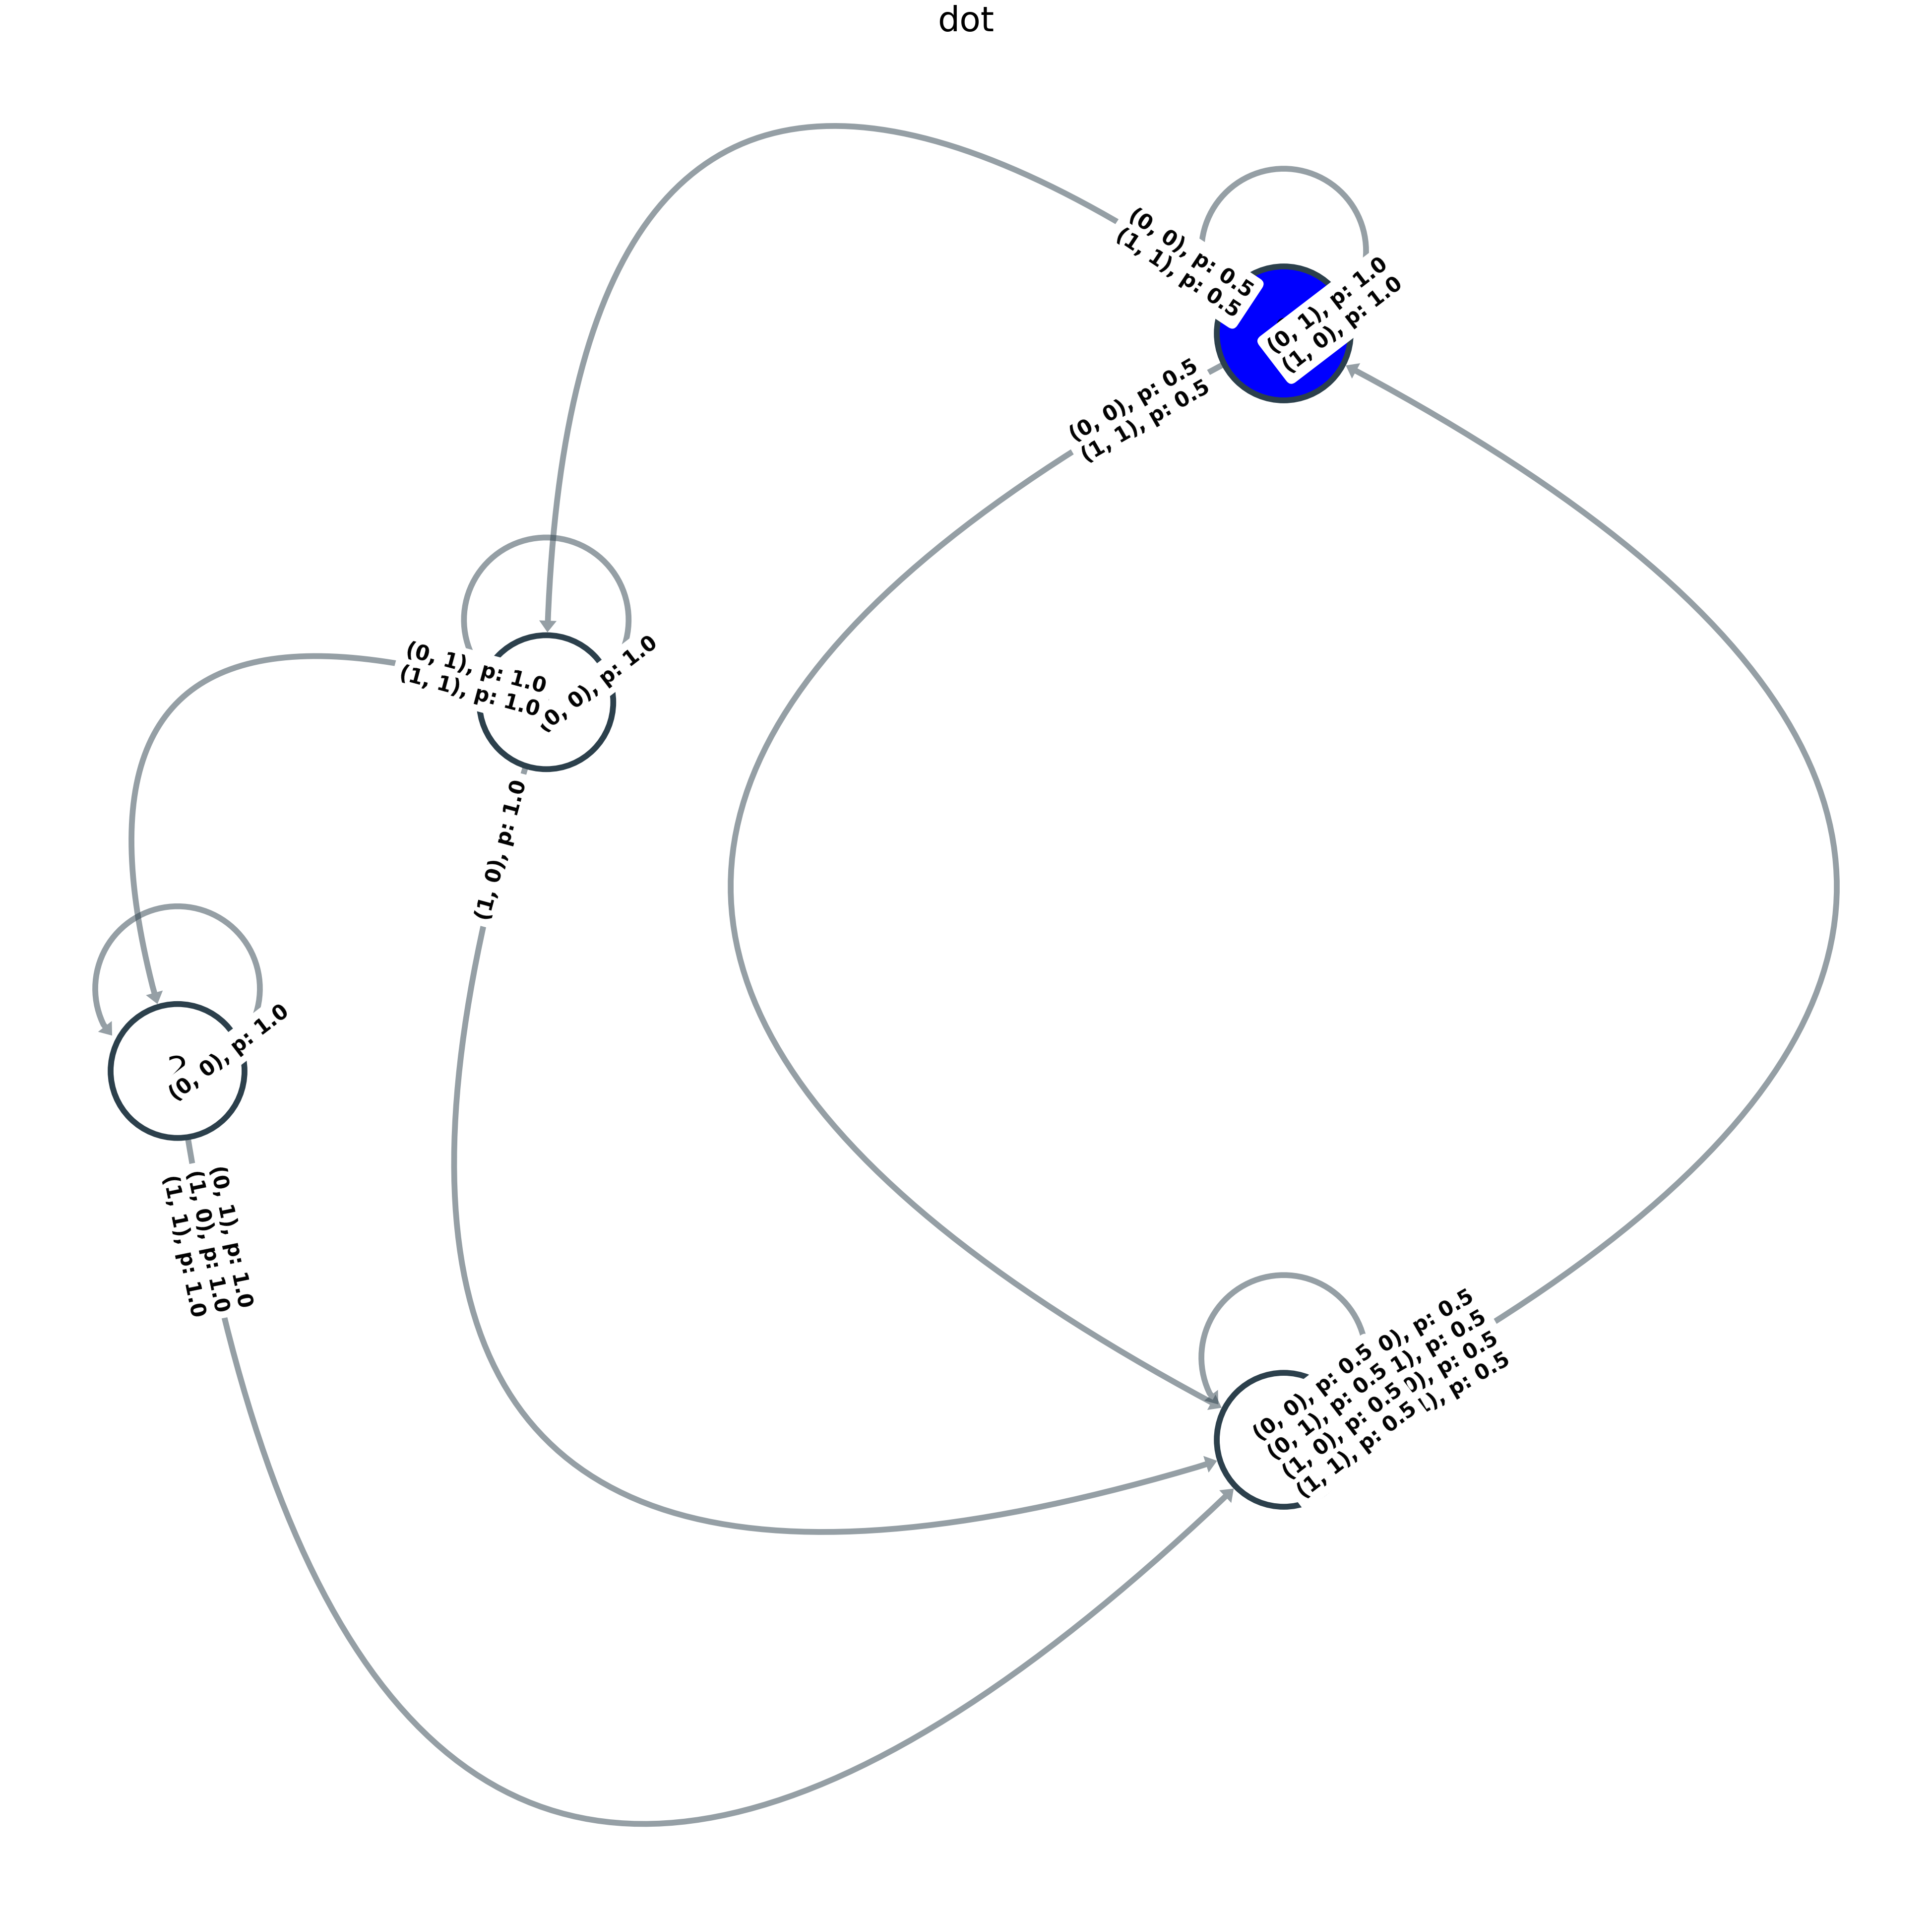

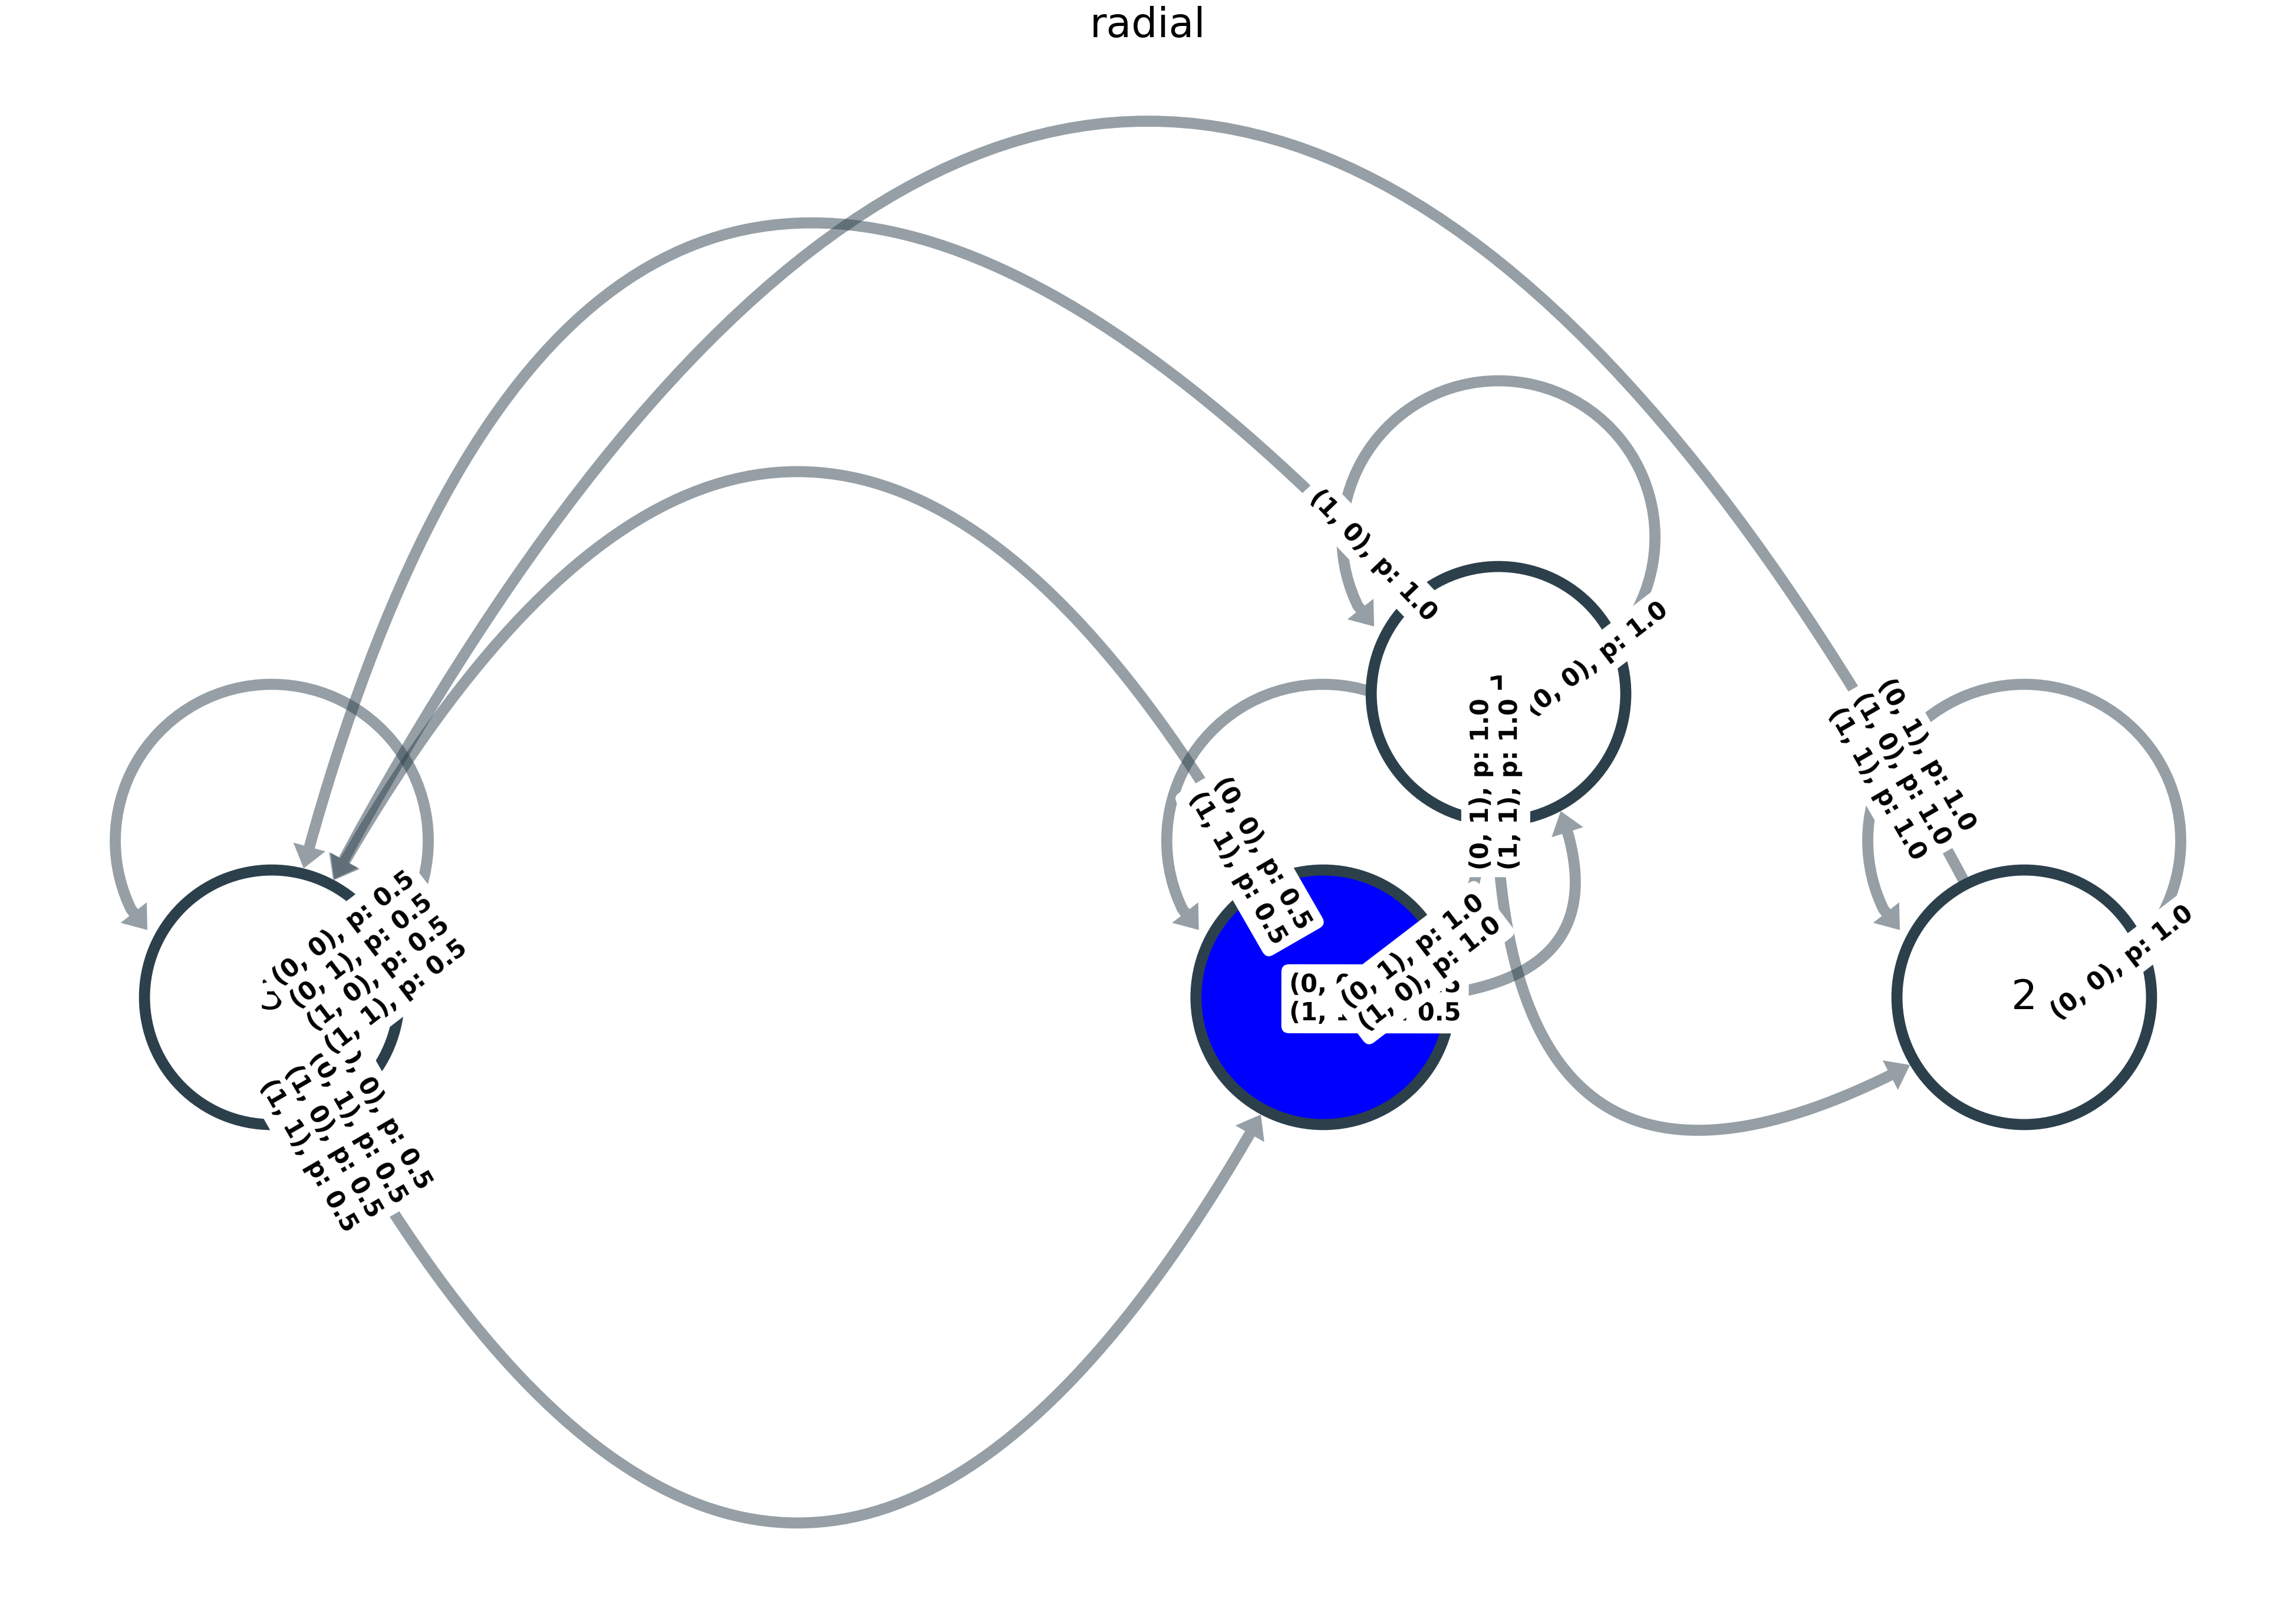

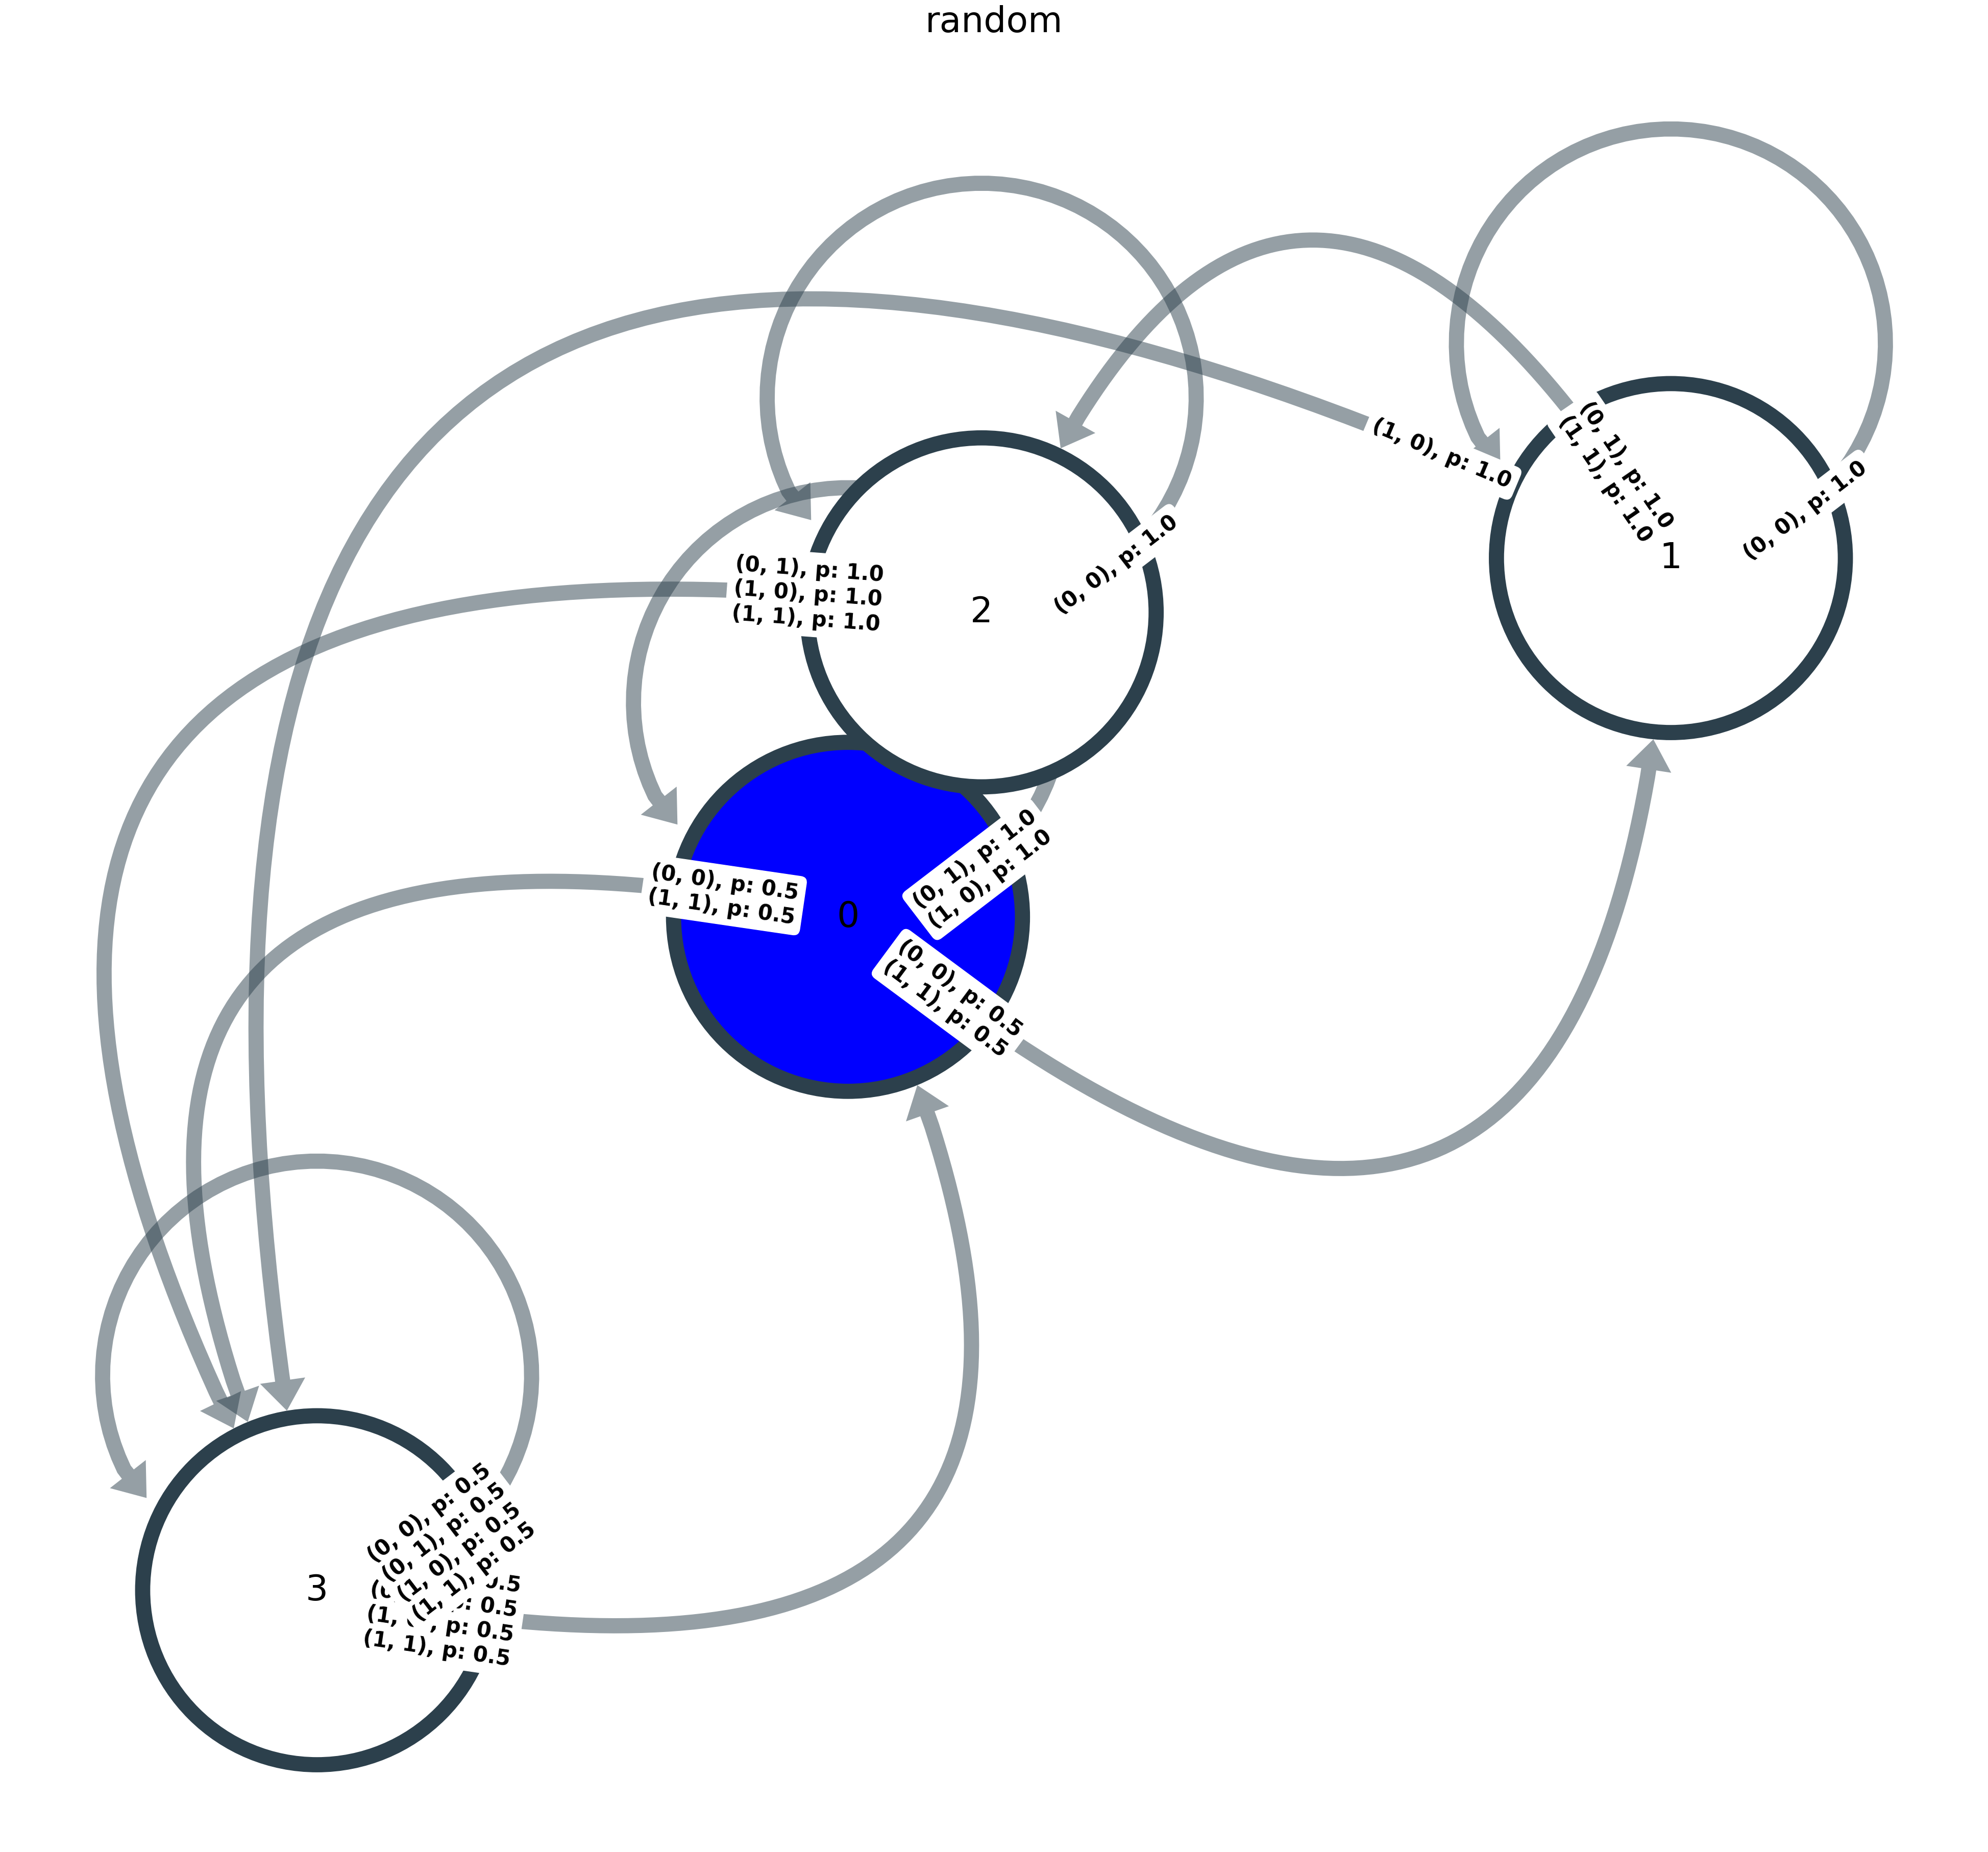

In [7]:
node_layouts = ['circular', 'linear', 'dot', 'radial', 'random']
for node_layout in node_layouts:
    fig, ax = plt.subplots(figsize=(50, 50))
    ax.set_title(node_layout, fontsize=50)
    Graph(G, node_labels=True, node_layout=node_layout, edge_labels=edge_labels,
          edge_label_fontdict=dict(size=30, fontweight='bold'), edge_layout='arc',
          node_size=6, edge_width=0.5, arrows=True, ax=ax, node_color=node_colors, node_label_fontdict=dict(size=50), edge_label_position=0.1, edge_labels_rotate=True)


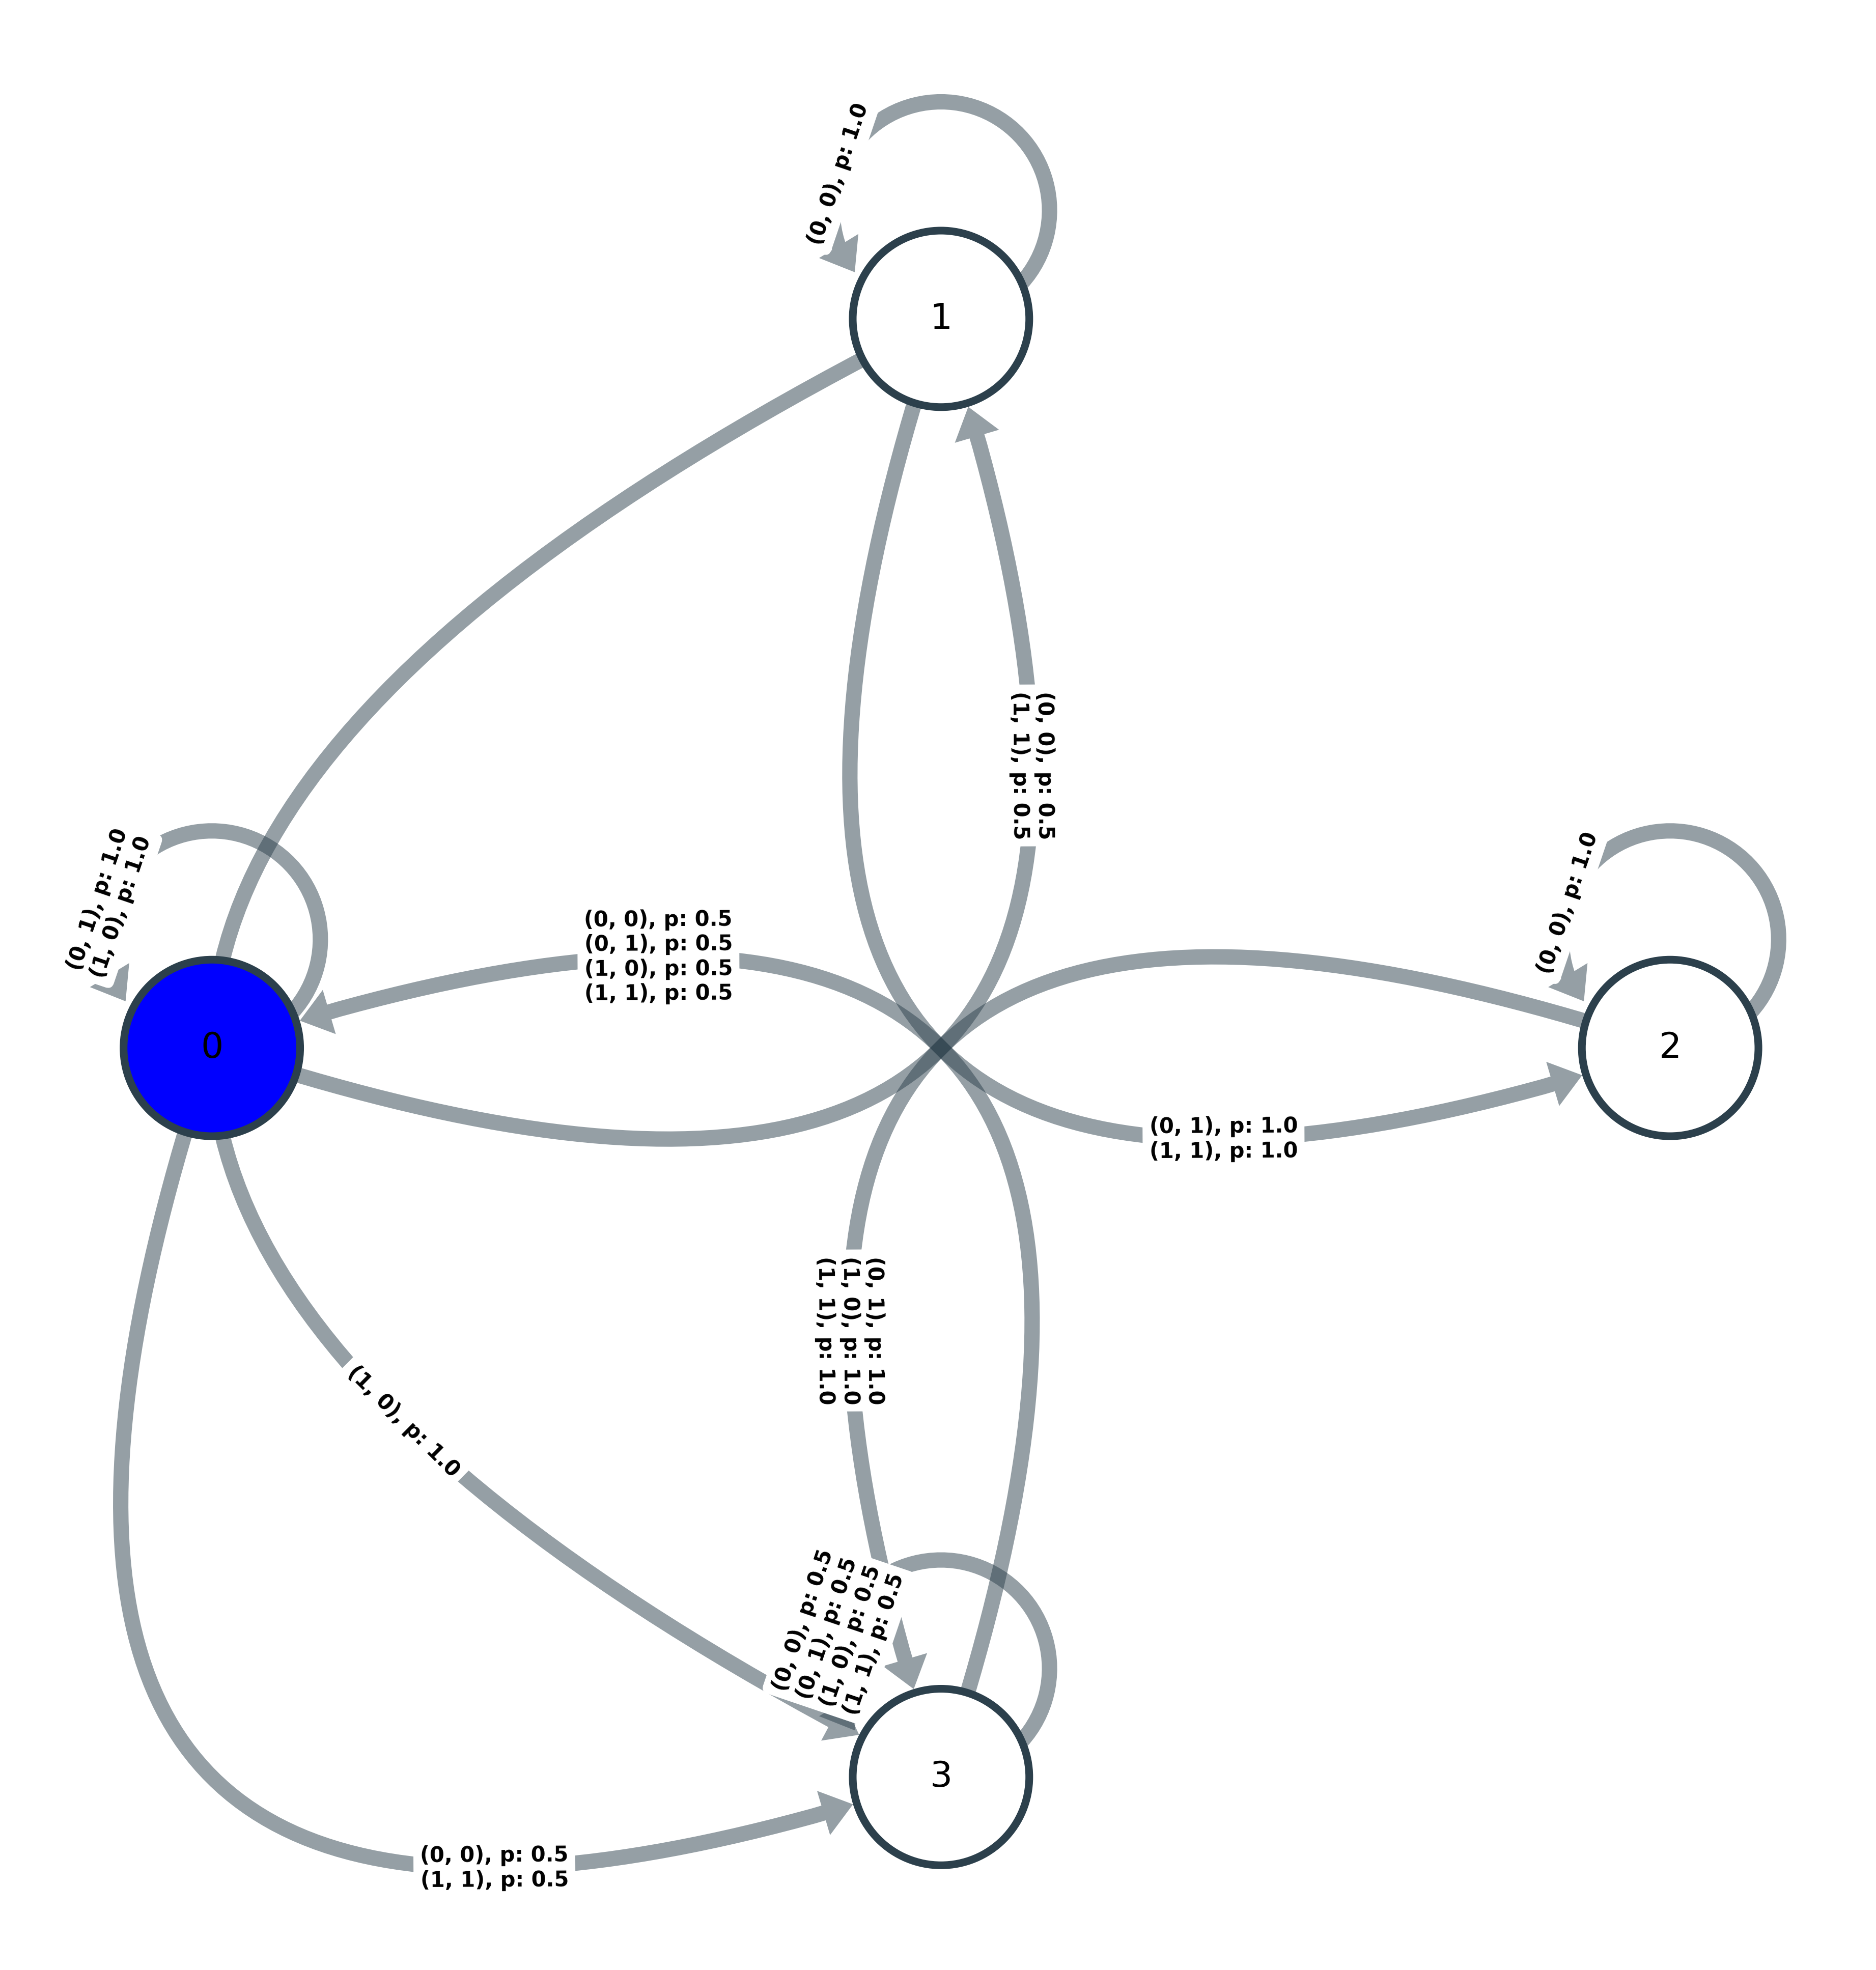

In [8]:
fig, ay = plt.subplots(figsize=(50, 50))
node_layouts = ['circular', 'linear', 'dot', 'radial', 'random']

Graph(G, seed=1, node_labels=True, node_layout=node_layouts[0], edge_labels=edge_labels,
          edge_label_fontdict=dict(size=30, fontweight='bold'), edge_layout='arc',
          node_size=6, edge_width=1, arrows=True, ax=ay, node_color=node_colors, node_label_fontdict=dict(size=50), edge_label_position=0.70, edge_labels_rotate=False)

In [9]:
current_state = 0

# nodes and edges customization
node_shape = 'o' # 'o' for circle, 's' for square, '^' for triangle
node_size = 6
node_edge_width = 1
node_edge_color = {}
node_color = {}
for state in G.nodes():
    if state == current_state:
        node_edge_color[state] = 'b'
    else:
        node_edge_color[state] = 'k'
    node_color[state] = 'w'
node_labels = {state: str(state) for state in G.nodes()}
node_label_fontdict = {'size': 100, 'color': 'k', 'weight': 'bold'}

edge_width = 2
edge_color = {}
for edge in G.edges():
    edge_color[edge] = 'k'
edge_layout = 'curved' # 'arc', 'curved', 'straight'
arrows = True
arrowstyle = '->' # options: ['-', '->', '-[', '-|>', '<|-', '<|-|>', '<|-', '<|-|', '<->', '<-|', '<-|>', '<->|', '<-|->', '<-|->|', '<-|->|<', '<-|->|>']
arrowsize = 20
edge_label_fontdict = {'size': 100, 'color': 'k', 'weight': 'normal'}
edge_label_positions = {edge: (0.1, 0.1) for edge in G.edges()}
edge_label_rotate = False


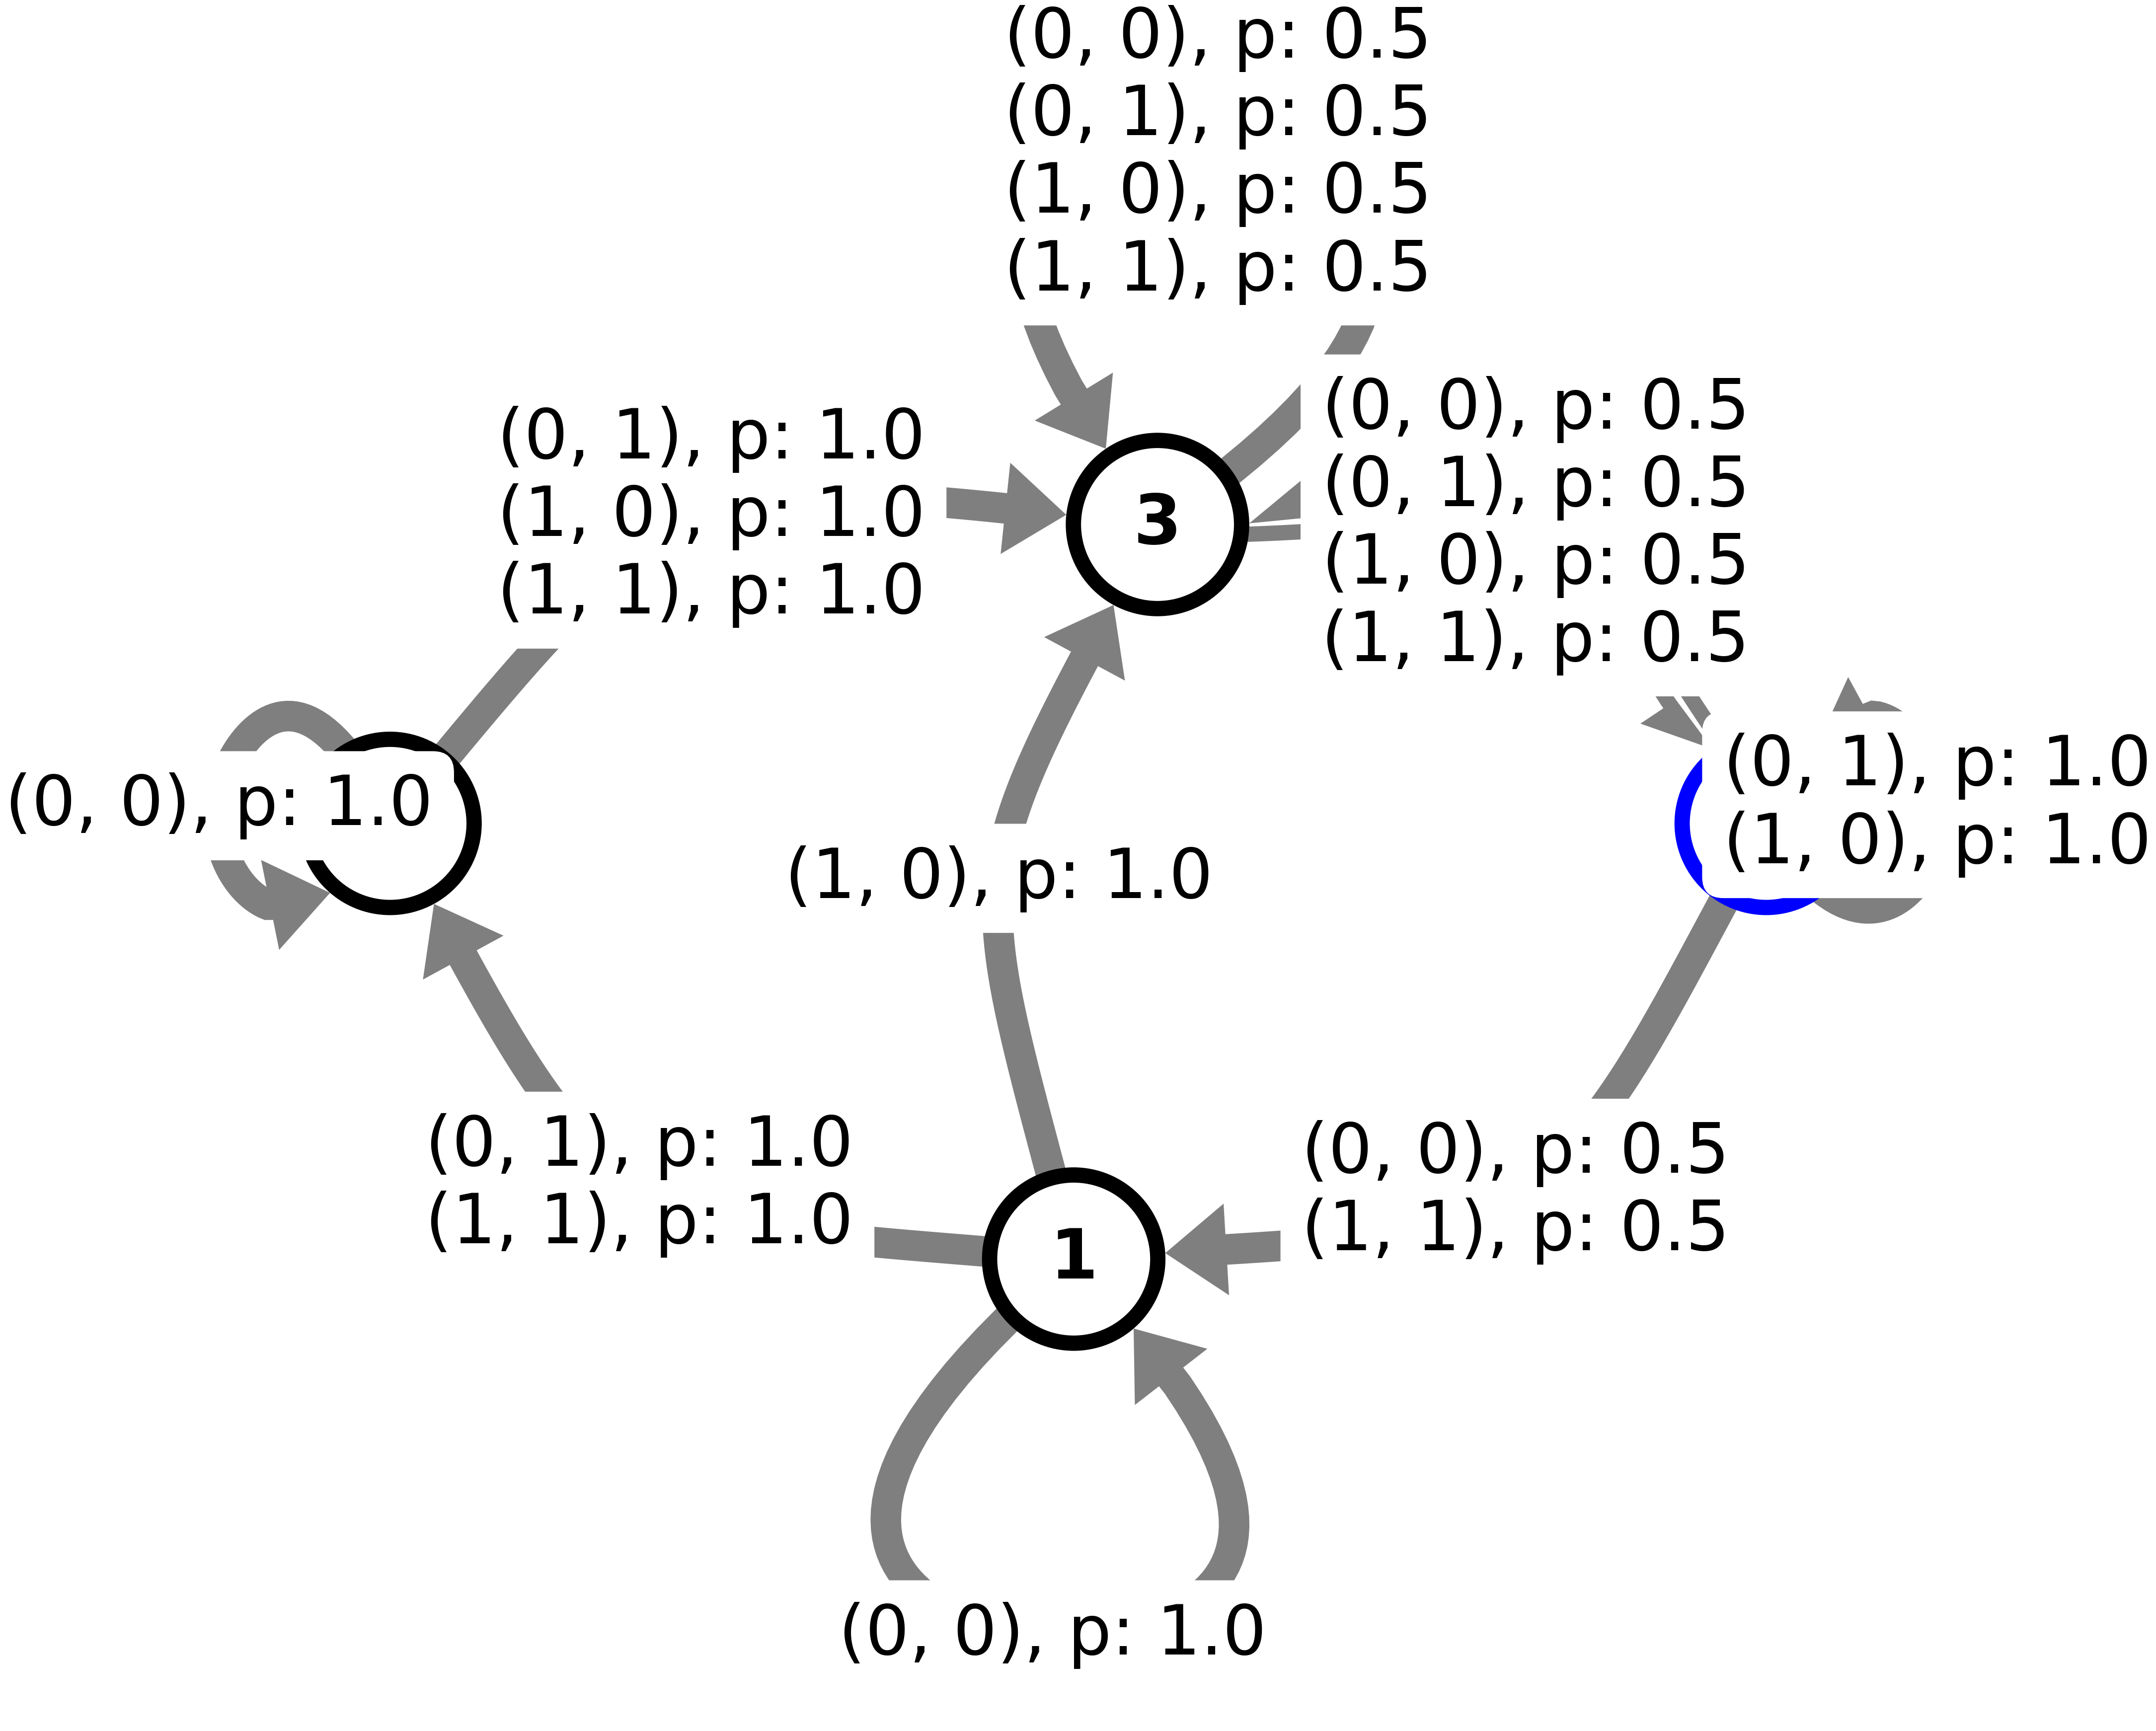

In [10]:
fig, ax = plt.subplots(figsize=(50, 50))

Graph(G, node_shape=node_shape, node_size=node_size, node_edge_color=node_edge_color, node_color=node_color, node_edge_width=node_edge_width, node_labels=node_labels, node_label_fontdict=node_label_fontdict, edge_width=edge_width, edge_color=edge_color, edge_layout=edge_layout, arrows=arrows, arrowstyle=arrowstyle, arrowsize=arrowsize, edge_labels=edge_labels, edge_label_fontdict=edge_label_fontdict, edge_label_positions=edge_label_positions, edge_label_rotate=edge_label_rotate, ax=ax)



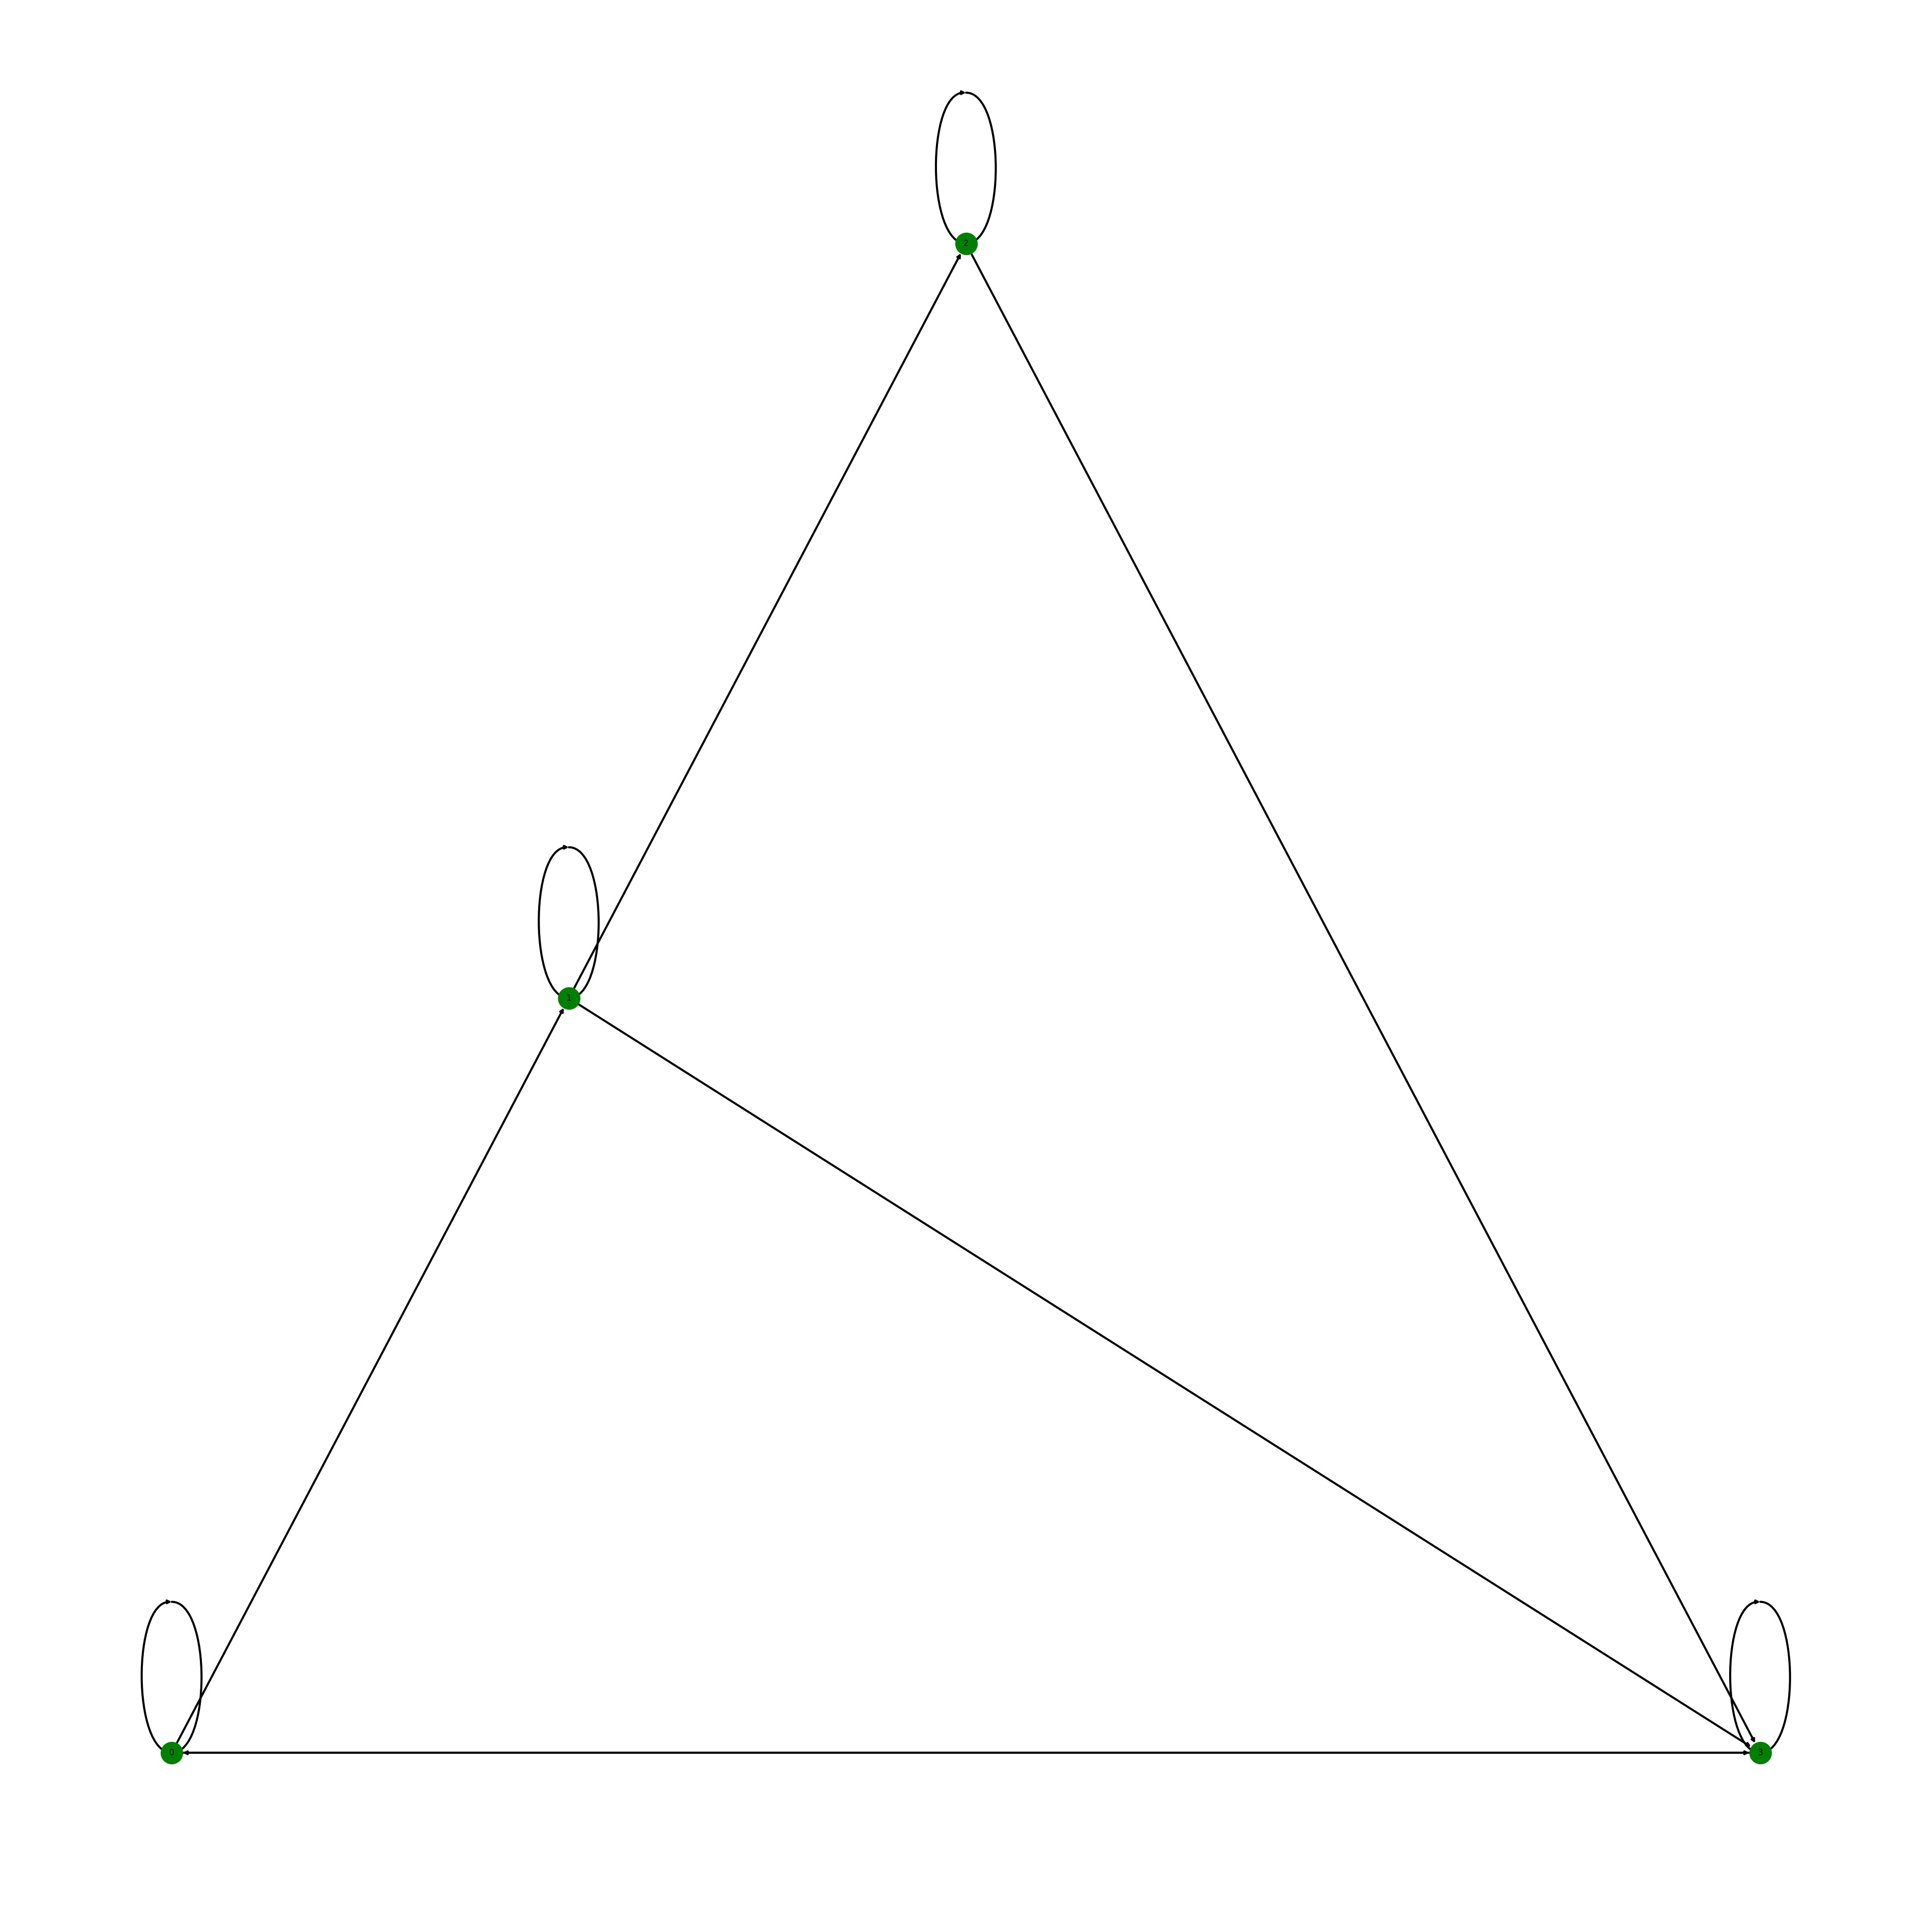

In [11]:
# setting paramethers for plottig the graph with netwrokx
options = {'node_color': 'green', 'node_size': 1000, 'width': 3}
node_edge_colors = {}
node_colors = {}
for state in G.nodes():
    if state == current_state:
        node_edge_color[state] = 'b'
    else:
        node_edge_color[state] = 'k'
    node_color[state] = 'w'

#plot the graph
fig, ax = plt.subplots(figsize=(50, 50))
try:
    nx.draw_planar(G, **options, with_labels=True, ax=ax)
except:
    nx.draw_circular(G, **options, with_labels=True, ax=ax)
plt.show()


[(0, 1), (0, 3), (0, 0), (1, 1), (1, 2), (1, 3), (3, 0), (3, 3), (2, 2), (2, 3)]
[0, 1, 3, 2]


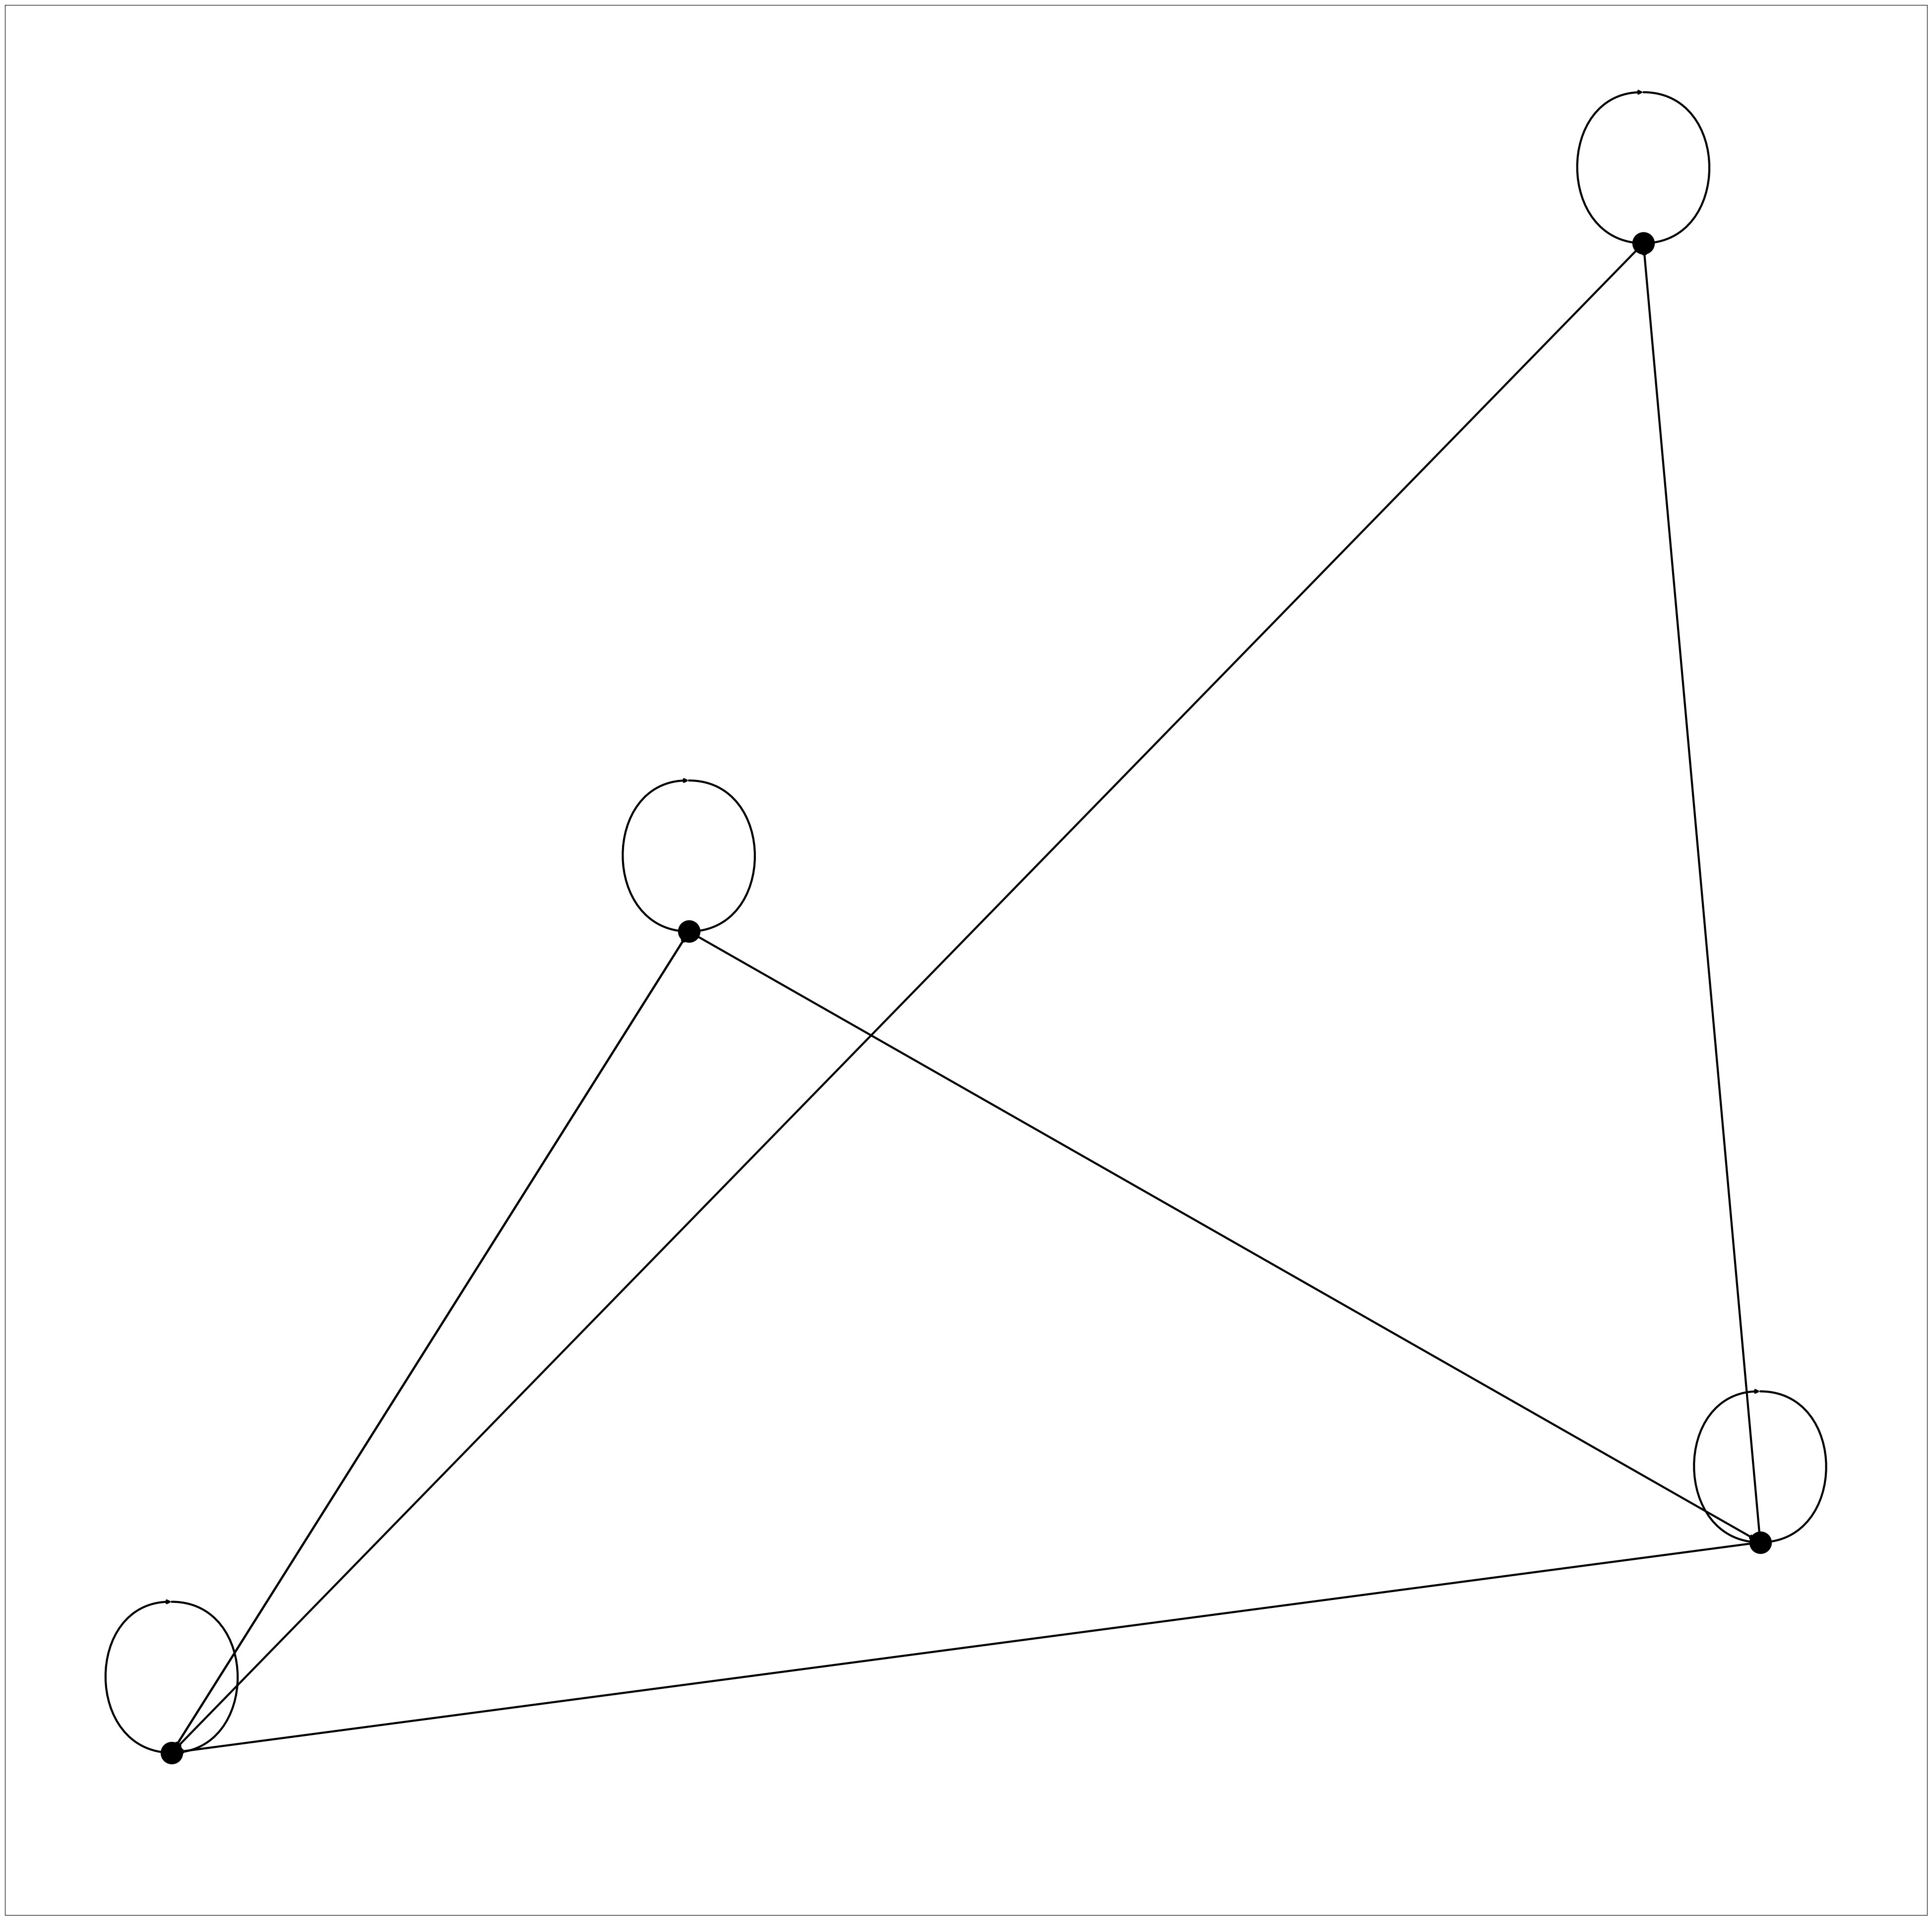

In [12]:
fig = plt.figure(figsize=(50, 50))
ax = fig.add_subplot()

print(G.edges())
print(G.nodes())

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax=ax, node_size=1000, node_color='black')
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=G.edges(), width=3)

plt.show()